# 2016 New coder Survey 

The dataset ([link dataset](https://www.kaggle.com/freecodecamp/2016-new-coder-survey-?select=2016-FCC-New-Coders-Survey-Data.csv)) includes more than 15,000 people who are actively learning to code. The goal was to understand these people's motivations in learning to code, how they're learning to code, their demographics, and their socioeconomic background.

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
from scipy import stats

# visualization 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# statistical models
import statsmodels.api as sm 

# machine learning
from sklearn.linear_model import LogisticRegression

# others
import math

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('/content/sample_data/2016-FCC-New-Coders-Survey-Data.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (21,57) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Overview
The dataset consists of 15,620 subjects and 113 variables. Most of these variables are answer to survey questions. Boolean, categorical and numeric variables are dominant.

In [3]:
data.shape
data.info()
data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15620 entries, 0 to 15619
Columns: 113 entries, Age to StudentDebtOwe
dtypes: float64(85), object(28)
memory usage: 13.5+ MB


Index(['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampFullJobAfter',
       'BootcampLoanYesNo', 'BootcampMonthsAgo', 'BootcampName',
       'BootcampPostSalary', 'BootcampRecommend', 'ChildrenNumber',
       ...
       'ResourceSoloLearn', 'ResourceStackOverflow', 'ResourceTreehouse',
       'ResourceUdacity', 'ResourceUdemy', 'ResourceW3Schools',
       'ResourceYouTube', 'SchoolDegree', 'SchoolMajor', 'StudentDebtOwe'],
      dtype='object', length=113)

## Take a look at the variables (Univariate analysis)


### Job of interest?

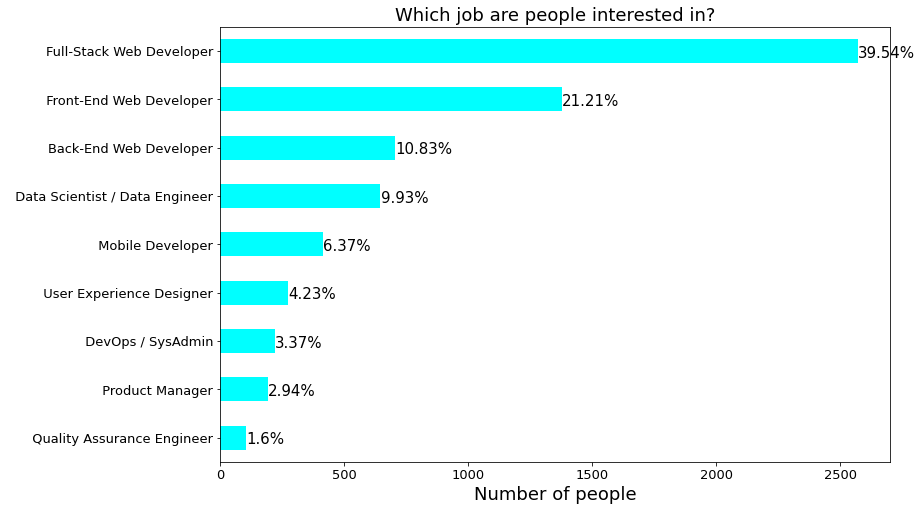

In [4]:
ax = data['JobRoleInterest'].value_counts().plot(kind='barh', figsize=(12,8), color="cyan", fontsize=13);
ax.set_alpha(0.9)
ax.set_title("Which job are people interested in?", fontsize=18)
ax.set_xlabel("Number of people", fontsize=18);
ax.set_xticks([0, 500, 1000, 1500, 2000, 2500])

# create a list to collect the plt.patches data
totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, str(round((i.get_width()/total)*100, 2))+'%', fontsize=15, color='black')

# invert for largest on top 
ax.invert_yaxis()

### Who participated?

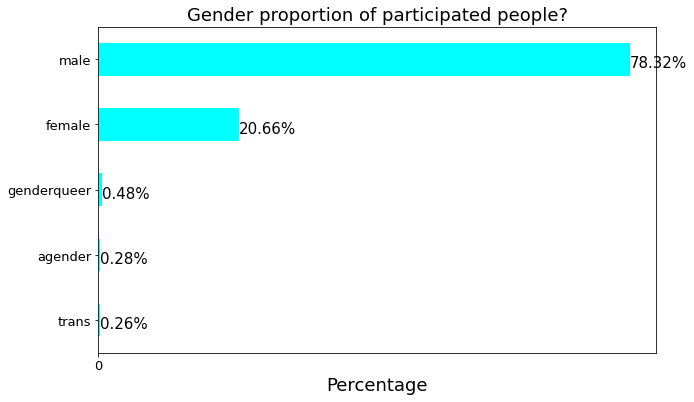

In [5]:
ax = data['Gender'].value_counts().plot(kind='barh', figsize=(10,6), color="cyan", fontsize=13);
ax.set_alpha(0.9)
ax.set_title("Gender proportion of participated people?", fontsize=18)
ax.set_xlabel("Percentage", fontsize=18);
ax.set_xticks([0])

# create a list to collect the plt.patches data
totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, str(round((i.get_width()/total)*100, 2))+'%', fontsize=15, color='black')

# invert for largest on top 
ax.invert_yaxis()

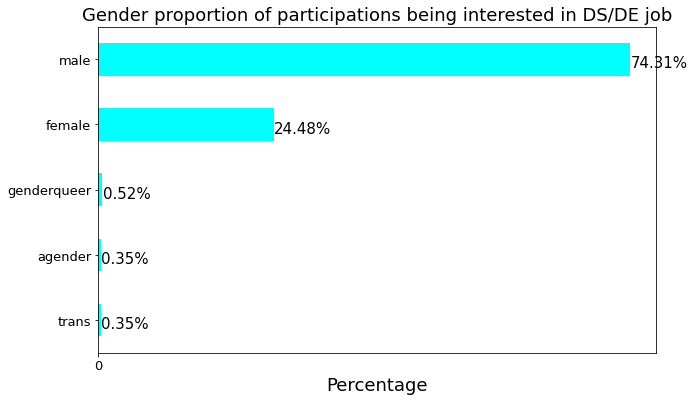

In [6]:
data['JobRoleInterest'].unique()
dt = data[data.JobRoleInterest=='  Data Scientist / Data Engineer']
ax = dt['Gender'].value_counts().plot(kind='barh', figsize=(10,6), color="cyan", fontsize=13);
ax.set_alpha(0.9)
ax.set_title("Gender proportion of participations being interested in DS/DE job", fontsize=18)
ax.set_xlabel("Percentage", fontsize=18);
ax.set_xticks([0])

# create a list to collect the plt.patches data
totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, str(round((i.get_width()/total)*100, 2))+'%', fontsize=15, color='black')

# invert for largest on top 
ax.invert_yaxis()

<font color=blue|red|green|pink|yellow>Only quarter of coders is woman. DS/DE-interest people appear to draw a few more females.</font> 

### How old new coders are?


In [7]:
[data['Age'].quantile([0, 0.25,0.5,0.75, 1]), dt['Age'].quantile([0, 0.25,0.5,0.75, 1])]

[0.00    10.0
 0.25    23.0
 0.50    27.0
 0.75    33.0
 1.00    86.0
 Name: Age, dtype: float64, 0.00    14.00
 0.25    22.00
 0.50    26.00
 0.75    31.25
 1.00    65.00
 Name: Age, dtype: float64]

<font color=blue|red|green|pink|yellow>The median age of new coders is one year older than the median age of DS/DE-interest coders</font>, but the starting age of new coders is four years younger than DS/DE-interest coders.

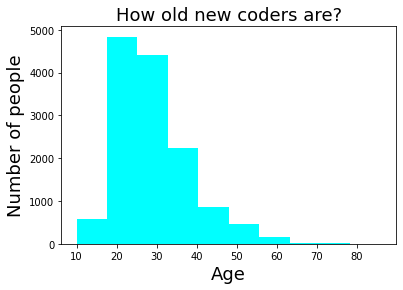

In [8]:
ax = data['Age'].hist(color="cyan")
ax.set_title("How old new coders are?", fontsize=18)
ax.set_xlabel("Age", fontsize=18)
ax.set_ylabel("Number of people", fontsize=18)
ax.grid(False)

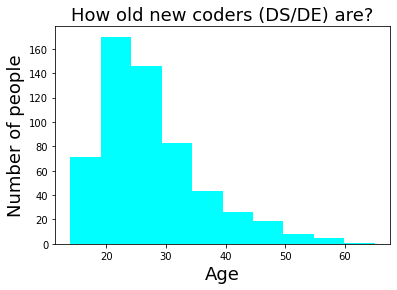

In [9]:
ax = dt['Age'].hist(color="cyan")
ax.set_title("How old new coders (DS/DE) are?", fontsize=18)
ax.set_xlabel("Age", fontsize=18)
ax.set_ylabel("Number of people", fontsize=18)
ax.grid(False)

The histogram is long-tail type. It is clear that the data is log transformed.

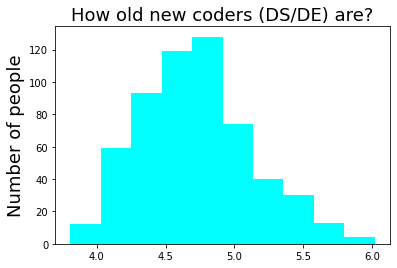

In [10]:
ax = np.log2(dt['Age']).hist(color="cyan")
ax.set_title("How old new coders (DS/DE) are?", fontsize=18)
ax.set_ylabel("Number of people", fontsize=18)
ax.grid(False)

### How many hours do they spend on learning?

In [11]:
[data['HoursLearning'].quantile([0,.25,.5,.75,1]), dt['HoursLearning'].quantile([0,.25,.5,.75,1])]

[0.00      0.0
 0.25      5.0
 0.50     10.0
 0.75     20.0
 1.00    100.0
 Name: HoursLearning, dtype: float64, 0.00     0.0
 0.25     5.0
 0.50    10.0
 0.75    20.0
 1.00    80.0
 Name: HoursLearning, dtype: float64]

<font color=blue|red|green|pink|yellow>The median hours they spend on learning is 5 hours.<font>

The first quartile, median and third quartile are the same for the whole population and the group of DS/DE-interest people. They lead to the right-skewed distribution as follows.

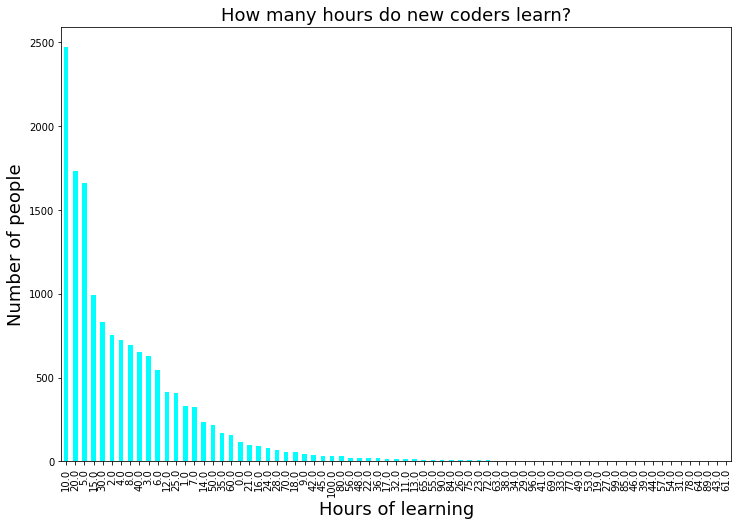

In [12]:
ax = data['HoursLearning'].value_counts().plot(kind = 'bar', figsize = (12,8), color='cyan')
ax.set_title("How many hours do new coders learn?", fontsize=18)
ax.set_xlabel("Hours of learning", fontsize=18)
ax.set_ylabel("Number of people", fontsize=18)
ax.grid(False)

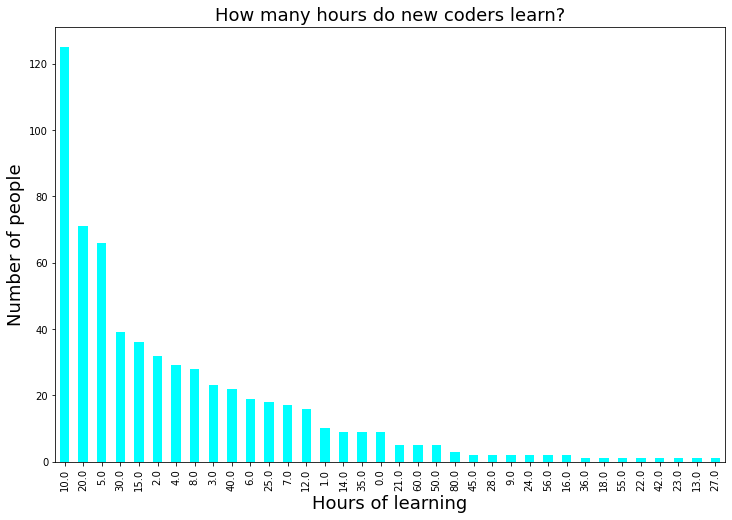

In [13]:
ax = dt['HoursLearning'].value_counts().plot(kind = 'bar', figsize = (12,8), color='cyan')
ax.set_title("How many hours do new coders learn?", fontsize=18)
ax.set_xlabel("Hours of learning", fontsize=18)
ax.set_ylabel("Number of people", fontsize=18)
ax.grid(False)

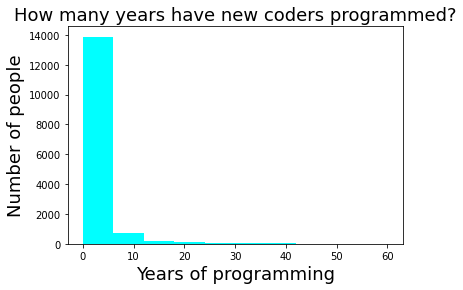

In [14]:
ax = (data['MonthsProgramming']/12).hist(color='cyan')
ax.set_title("How many years have new coders programmed?", fontsize=18)
ax.set_xlabel("Years of programming", fontsize=18)
ax.set_ylabel("Number of people", fontsize=18)
ax.grid(False)

It is skewed distribution.

### What jobs do they prefer?

In [15]:
data['JobPref'].unique()

array(['freelance ', 'work for a startup', 'start your own business',
       'work for a medium-sized company', nan,
       'work for a multinational corporation'], dtype=object)

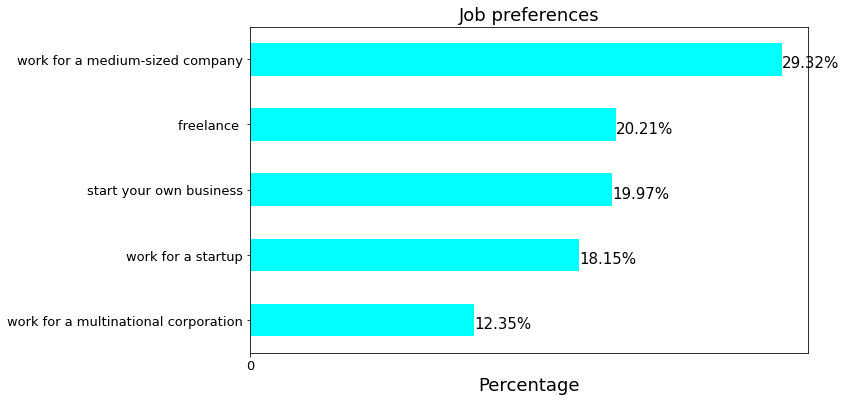

In [16]:
ax = data['JobPref'].value_counts().plot(kind='barh', figsize=(10,6), color="cyan", fontsize=13);
ax.set_alpha(0.9)
ax.set_title("Job preferences", fontsize=18)
ax.set_xlabel("Percentage", fontsize=18);
ax.set_xticks([0])

# create a list to collect the plt.patches data
totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, str(round((i.get_width()/total)*100, 2))+'%', fontsize=15, color='black')

# invert for largest on top 
ax.invert_yaxis()

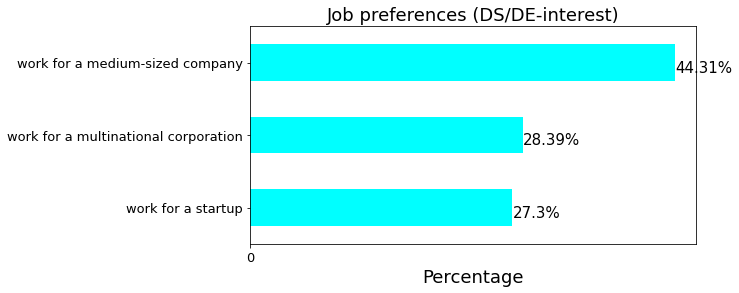

In [17]:
ax = dt['JobPref'].value_counts().plot(kind='barh', figsize=(8,4), color="cyan", fontsize=13);
ax.set_alpha(0.9)
ax.set_title("Job preferences (DS/DE-interest)", fontsize=18)
ax.set_xlabel("Percentage", fontsize=18);
ax.set_xticks([0])

# create a list to collect the plt.patches data
totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, str(round((i.get_width()/total)*100, 2))+'%', fontsize=15, color='black')

# invert for largest on top 
ax.invert_yaxis()

<font color=blue|red|green|pink|yellow>It is interesting that there is no one who is interested in DS/DE career wants to be freelance or start their own business.<font>

It is a bit shocking since I saw many DS/DE freelancers. I guess the design of survey causes this issue.

### When do they plan to start applying for jobs?

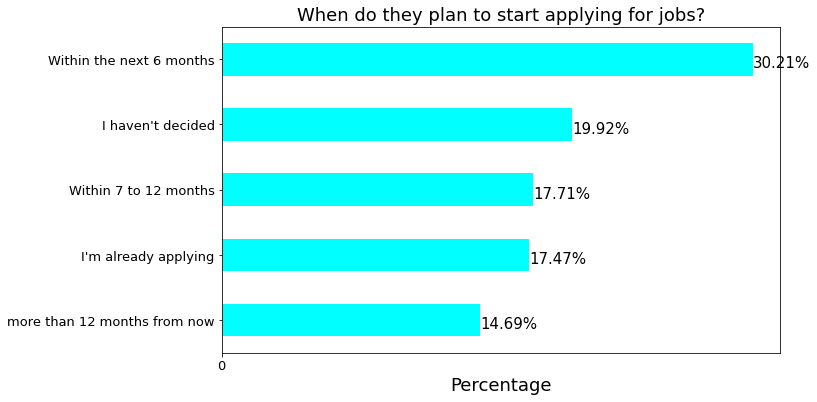

In [18]:
ax = data['JobApplyWhen'].value_counts().plot(kind='barh', figsize=(10,6), color="cyan", fontsize=13);
ax.set_alpha(0.9)
ax.set_title("When do they plan to start applying for jobs?", fontsize=18)
ax.set_xlabel("Percentage", fontsize=18);
ax.set_xticks([0])

# create a list to collect the plt.patches data
totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, str(round((i.get_width()/total)*100, 2))+'%', fontsize=15, color='black')

# invert for largest on top 
ax.invert_yaxis()

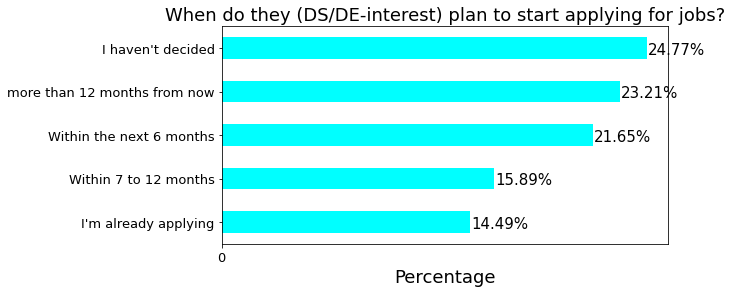

In [19]:
ax = dt['JobApplyWhen'].value_counts().plot(kind='barh', figsize=(8,4), color="cyan", fontsize=13);
ax.set_alpha(0.9)
ax.set_title("When do they (DS/DE-interest) plan to start applying for jobs?", fontsize=18)
ax.set_xlabel("Percentage", fontsize=18);
ax.set_xticks([0])

# create a list to collect the plt.patches data
totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, str(round((i.get_width()/total)*100, 2))+'%', fontsize=15, color='black')

# invert for largest on top 
ax.invert_yaxis()

<font color=blue|red|green|pink|yellow> 52% percent of DS/DE people are already applying for jobs, or will start applying within 12 months. <font>

Two plots also show that DS/DE-interest people take longer time to prepare than overall population.

<font color=blue|red|green|pink|yellow> More than half of them want to work in an office. 

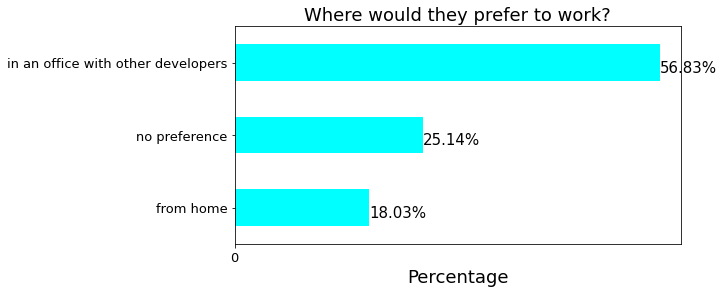

In [20]:
ax = data['JobWherePref'].value_counts().plot(kind='barh', figsize=(8,4), color="cyan", fontsize=13);
ax.set_alpha(0.9)
ax.set_title("Where would they prefer to work?", fontsize=18)
ax.set_xlabel("Percentage", fontsize=18);
ax.set_xticks([0])

# create a list to collect the plt.patches data
totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, str(round((i.get_width()/total)*100, 2))+'%', fontsize=15, color='black')

# invert for largest on top 
ax.invert_yaxis()

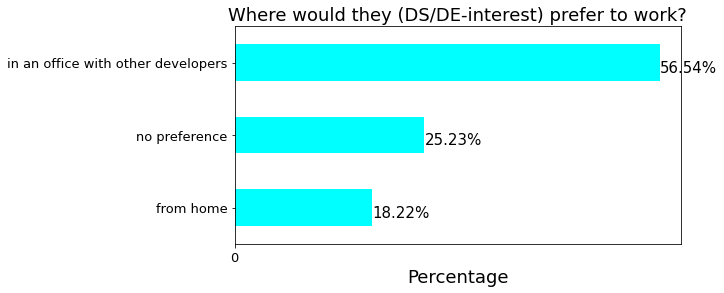

In [21]:
ax = dt['JobWherePref'].value_counts().plot(kind='barh', figsize=(8,4), color="cyan", fontsize=13);
ax.set_alpha(0.9)
ax.set_title("Where would they (DS/DE-interest) prefer to work?", fontsize=18)
ax.set_xlabel("Percentage", fontsize=18);
ax.set_xticks([0])

# create a list to collect the plt.patches data
totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, str(round((i.get_width()/total)*100, 2))+'%', fontsize=15, color='black')

# invert for largest on top 
ax.invert_yaxis()

<font color=blue|red|green|pink|yellow> And most of them are willing to relocate.

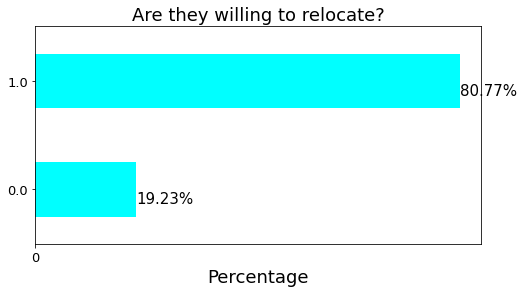

In [22]:
ax = dt['JobRelocateYesNo'].value_counts().plot(kind='barh', figsize=(8,4), color="cyan", fontsize=13);
ax.set_alpha(0.9)
ax.set_title("Are they willing to relocate?", fontsize=18)
ax.set_xlabel("Percentage", fontsize=18);
ax.set_xticks([0])

# create a list to collect the plt.patches data
totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, str(round((i.get_width()/total)*100, 2))+'%', fontsize=15, color='black')

# invert for largest on top 
ax.invert_yaxis()

<font color=blue|red|green|pink|yellow> Most of them have not attended Bootcamp. Only 2% people attended Bootcamp.

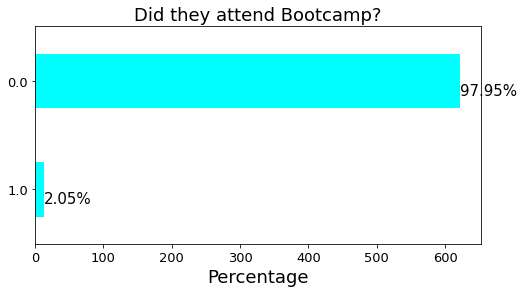

In [23]:
ax = dt['AttendedBootcamp'].value_counts().plot(kind='barh', figsize=(8,4), color="cyan", fontsize=13);
ax.set_alpha(0.9)
ax.set_title("Did they attend Bootcamp?", fontsize=18)
ax.set_xlabel("Percentage", fontsize=18);

# create a list to collect the plt.patches data
totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, str(round((i.get_width()/total)*100, 2))+'%', fontsize=15, color='black')

# invert for largest on top 
ax.invert_yaxis()

### Have they ever attended any in-person event?

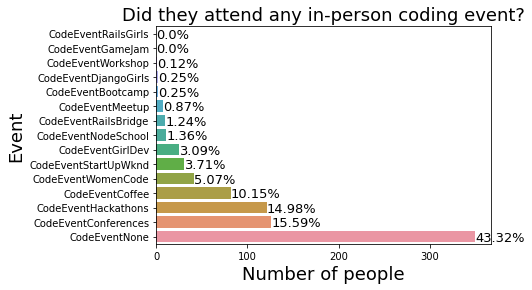

In [24]:
in_person_events_cols = [col for col in dt.columns if 'Code' in col[:4]]
in_person_events_cols.remove('CodeEventOther')
in_person = dt[in_person_events_cols].sum(axis=0, skipna=True)
in_person = pd.DataFrame(in_person)
val = [in_person.values[i][0] for i in range(len(in_person.values))]
in_person_events = {'Events': list(in_person.index), 'Num': val}
in_person_events = pd.DataFrame(in_person_events)
in_person_events = in_person_events.sort_values('Num', ascending=False)

# plot
ax = sns.barplot(data = in_person_events, y='Events', x='Num')
ax.set_alpha(0.9)
ax.set_title("Did they attend any in-person coding event?", fontsize=18)
ax.set_xlabel("Number of people", fontsize=18)
ax.set_ylabel('Event', fontsize=18)
ax.set_xticks([0, 100, 200, 300])
# set figure size
sns.set(rc={'figure.figsize':(14, 10)})

# create a list to collect the plt.patches data
totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width(), i.get_y()+0.1, str(round((i.get_width()/total)*100, 2))+'%', fontsize=13, color='black')

# invert for largest on top 
ax.invert_yaxis()

<font color=blue|red|green|pink|yellow> 43% people have not attended any in-person coding event.

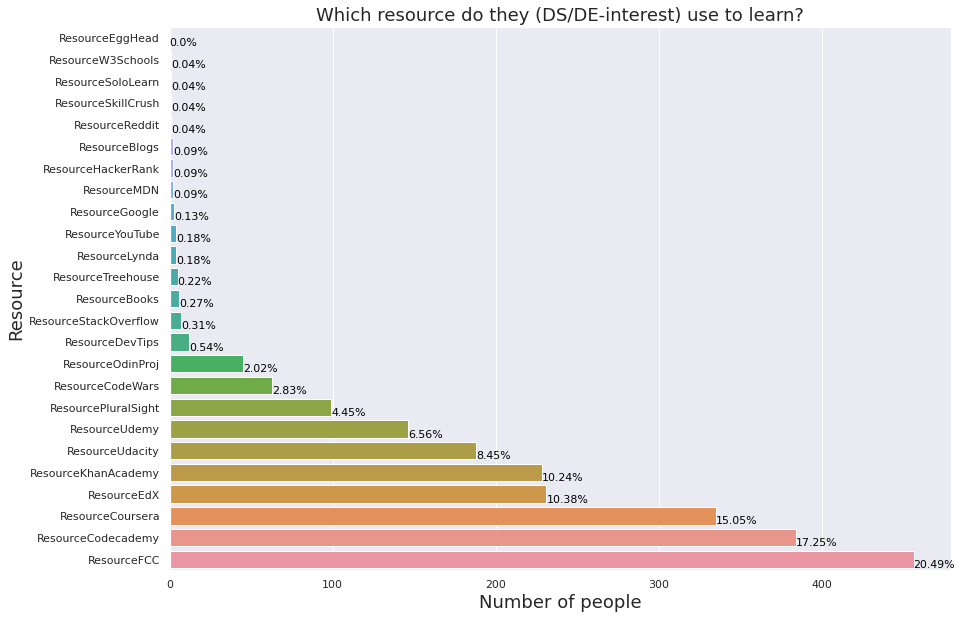

In [25]:
resource_cols = [col for col in dt.columns if 'Resource' in col]
resources = dt[resource_cols].sum(axis=0, skipna=True)
resources = pd.DataFrame(resources)
val = [resources.values[i][0] for i in range(len(resources.values))]
resources = {'Events': list(resources.index), 'Num': val}
resources = pd.DataFrame(resources)
resources = resources.sort_values('Num', ascending=False)

# plot
ax = sns.barplot(data = resources, y='Events', x='Num')
ax.set_alpha(0.9)
ax.set_title("Which resource do they (DS/DE-interest) use to learn?", fontsize=18)
ax.set_xlabel("Number of people", fontsize=18)
ax.set_ylabel('Resource', fontsize=18)
ax.set_xticks([0, 100, 200, 300, 400])
# set figure size
sns.set(rc={'figure.figsize':(14, 10)})

# create a list to collect the plt.patches data
totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width(), i.get_y()+0.03, str(round((i.get_width()/total)*100, 2))+'%', fontsize=11, color='black')

# invert for largest on top 
ax.invert_yaxis()

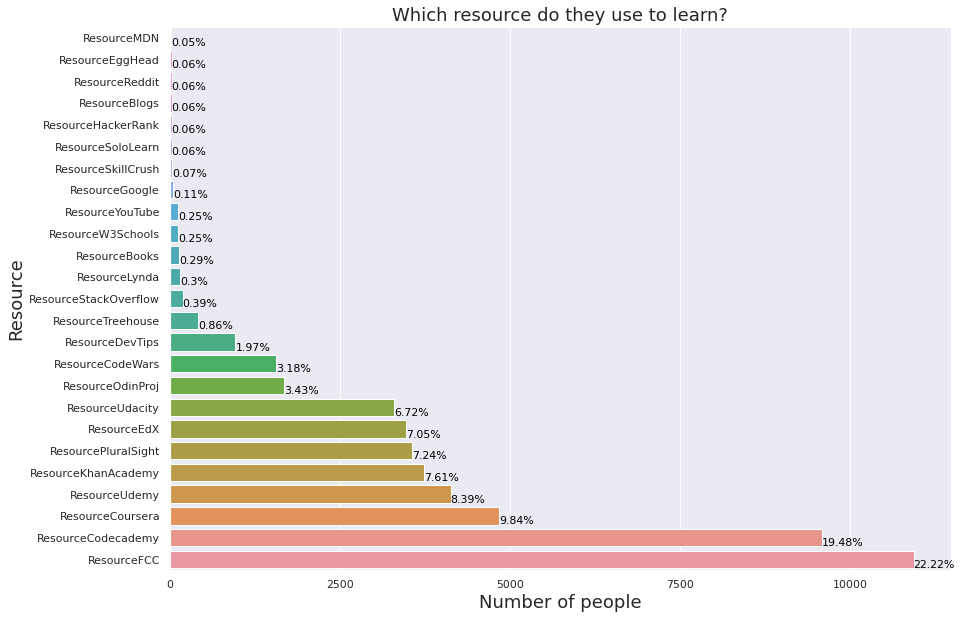

In [26]:
resource_cols = [col for col in dt.columns if 'Resource' in col]
resources = data[resource_cols].sum(axis=0, skipna=True)
resources = pd.DataFrame(resources)
val = [resources.values[i][0] for i in range(len(resources.values))]
resources = {'Events': list(resources.index), 'Num': val}
resources = pd.DataFrame(resources)
resources = resources.sort_values('Num', ascending=False)

# plot
ax = sns.barplot(data = resources, y='Events', x='Num')
ax.set_alpha(0.9)
ax.set_title("Which resource do they use to learn?", fontsize=18)
ax.set_xlabel("Number of people", fontsize=18)
ax.set_ylabel('Resource', fontsize=18)
ax.set_xticks([0, 2500, 5000, 7500, 10000])
# set figure size
sns.set(rc={'figure.figsize':(14, 10)})

# create a list to collect the plt.patches data
totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width(), i.get_y()+0.03, str(round((i.get_width()/total)*100, 2))+'%', fontsize=11, color='black')

# invert for largest on top 
ax.invert_yaxis()

<font color=blue|red|green|pink|yellow> Three popular resources that (DS/DE-interest) people often used are FCC, Codecademy, and Coursera. <font>

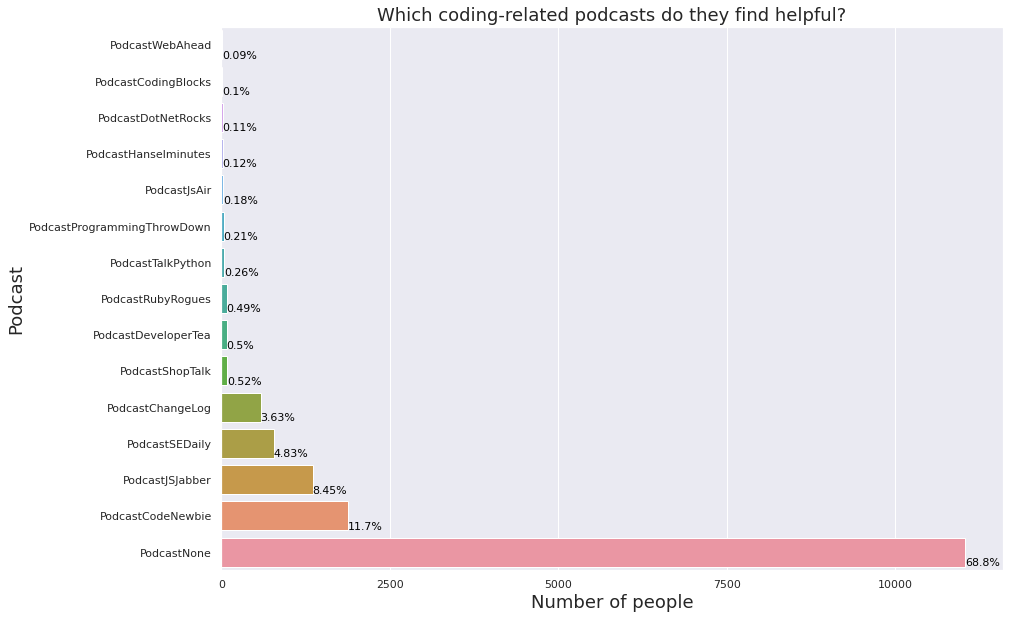

In [27]:
podcasts_col = [col for col in data.columns if 'Podcast' in col]
podcasts = data[podcasts_col].sum(axis=0, skipna=True)
podcasts = pd.DataFrame(podcasts)
val = [podcasts.values[i][0] for i in range(len(podcasts.values))]
podcasts = {'Events': list(podcasts.index), 'Num': val}
podcasts = pd.DataFrame(podcasts)
podcasts = podcasts.sort_values('Num', ascending=False)

# plot
ax = sns.barplot(data = podcasts, y='Events', x='Num')
ax.set_alpha(0.9)
ax.set_title("Which coding-related podcasts do they find helpful?", fontsize=18)
ax.set_xlabel("Number of people", fontsize=18)
ax.set_ylabel('Podcast', fontsize=18)
ax.set_xticks([0, 2500, 5000, 7500, 10000])
# set figure size
sns.set(rc={'figure.figsize':(14, 10)})

# create a list to collect the plt.patches data
totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width(), i.get_y()+0.03, str(round((i.get_width()/total)*100, 2))+'%', fontsize=11, color='black')

# invert for largest on top 
ax.invert_yaxis()

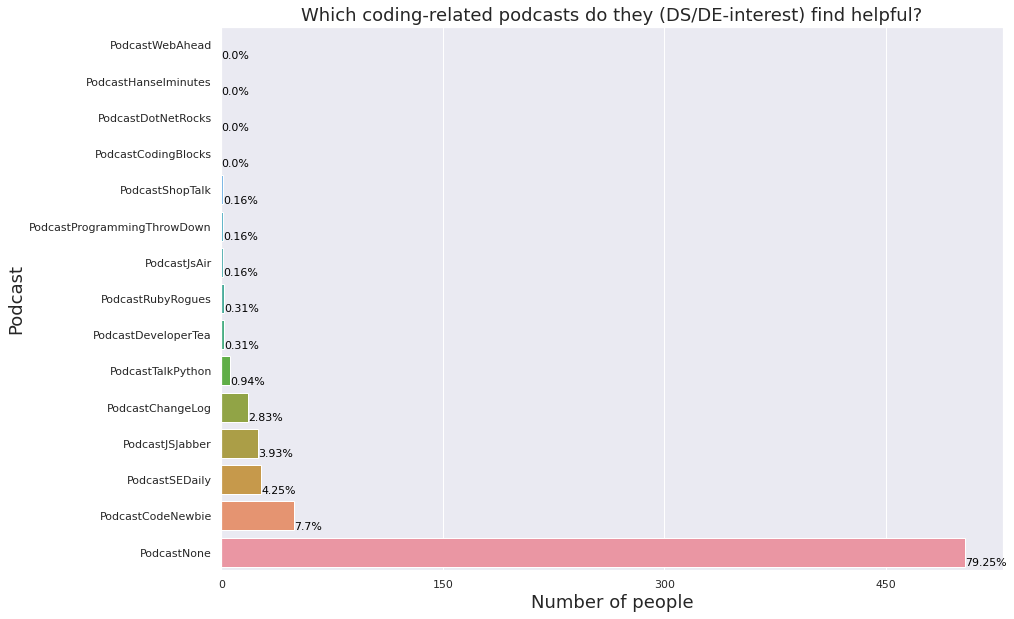

In [28]:
podcasts_col = [col for col in data.columns if 'Podcast' in col]
podcasts = dt[podcasts_col].sum(axis=0, skipna=True)
podcasts = pd.DataFrame(podcasts)
val = [podcasts.values[i][0] for i in range(len(podcasts.values))]
podcasts = {'Events': list(podcasts.index), 'Num': val}
podcasts = pd.DataFrame(podcasts)
podcasts = podcasts.sort_values('Num', ascending=False)

# plot
ax = sns.barplot(data = podcasts, y='Events', x='Num')
ax.set_alpha(0.9)
ax.set_title("Which coding-related podcasts do they (DS/DE-interest) find helpful?", fontsize=18)
ax.set_xlabel("Number of people", fontsize=18)
ax.set_ylabel('Podcast', fontsize=18)
ax.set_xticks([0, 150, 300, 450])
# set figure size
sns.set(rc={'figure.figsize':(14, 10)})

# create a list to collect the plt.patches data
totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width(), i.get_y()+0.03, str(round((i.get_width()/total)*100, 2))+'%', fontsize=11, color='black')

# invert for largest on top 
ax.invert_yaxis()

<font color=blue|red|green|pink|yellow> About 30% new coders listen to coding-related podcasts while only about 20% DS/DE-interest new coders listen to coding-related podcasts.

### Demographics and Socioeconomics
### Which country are they citizen of?

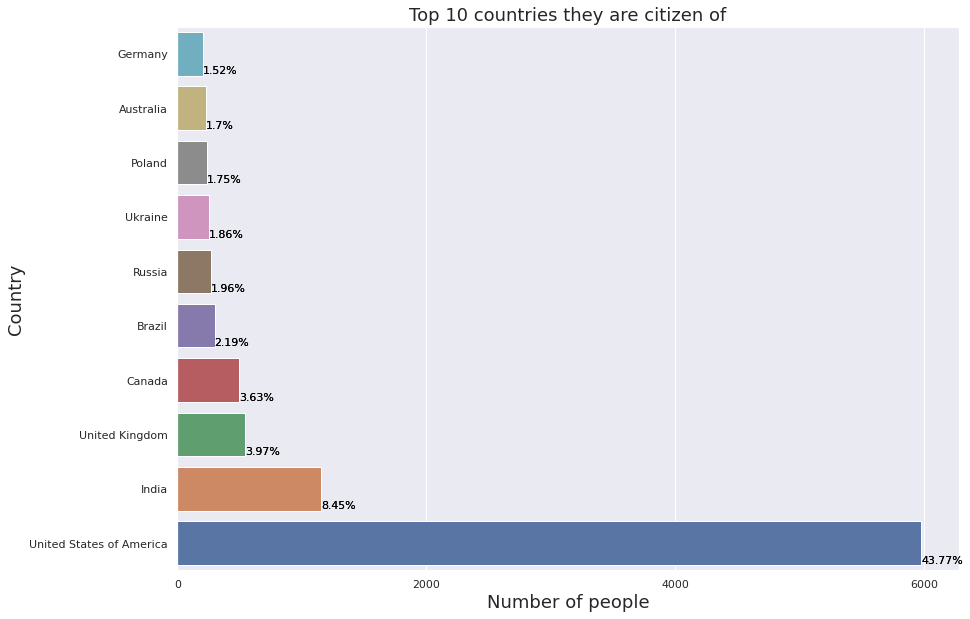

In [29]:
CountryCitizen = data['CountryCitizen'].value_counts()
country = pd.DataFrame({'Country': CountryCitizen.index, 'Num': CountryCitizen})
country = country.sort_values('Num', axis=0, ascending=False)
sel_country = country.head(10)
ax1 = sns.barplot(data = country, y='Country', x='Num')
# create a list to collect the plt.patches data
totals = []
# find the values and append to list
for i in ax1.patches:
    totals.append(i.get_width())
# set individual bar lables using above list
total = sum(totals)

# set figure size
sns.set(rc={'figure.figsize':(12, 4)})

ax = sns.barplot(data = sel_country, y='Country', x='Num')
ax.set_alpha(0.9)
ax.set_title("Top 10 countries they are citizen of", fontsize=18)
ax.set_xlabel("Number of people", fontsize=18)
ax.set_ylabel('Country', fontsize=18)
ax.set_xticks([0, 2000, 4000, 6000])

# set individual bar lables using above list
for i in ax.patches:
  if round((i.get_width()/total)*100, 2)>=1.52:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width(), i.get_y()+0.03, str(round((i.get_width()/total)*100, 2))+'%', fontsize=11, color='black')

# invert for largest on top 
ax.invert_yaxis()

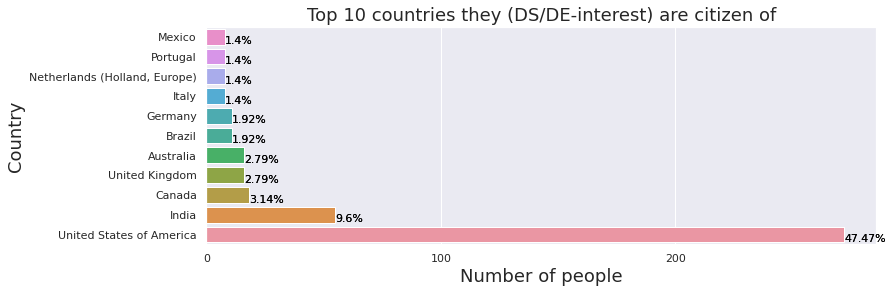

In [30]:
CountryCitizen = dt['CountryCitizen'].value_counts()
country = pd.DataFrame({'Country': CountryCitizen.index, 'Num': CountryCitizen})
country = country.sort_values('Num', axis=0, ascending=False)
sel_country = country.head(11)

ax1 = sns.barplot(data = country, y='Country', x='Num')
# create a list to collect the plt.patches data
totals = []
# find the values and append to list
for i in ax1.patches:
    totals.append(i.get_width())
# set individual bar lables using above list
total = sum(totals)

# set figure size
sns.set(rc={'figure.figsize':(12, 4)})

ax = sns.barplot(data = sel_country, y='Country', x='Num')
ax.set_alpha(0.9)
ax.set_title("Top 10 countries they (DS/DE-interest) are citizen of", fontsize=18)
ax.set_xlabel("Number of people", fontsize=18)
ax.set_ylabel('Country', fontsize=18)
ax.set_xticks([0, 100, 200])

# set individual bar lables using above list
for i in ax.patches:
  if round((i.get_width()/total)*100, 2)>=1.4:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width(), i.get_y()+0.03, str(round((i.get_width()/total)*100, 2))+'%', fontsize=11, color='black')

# invert for largest on top 
ax.invert_yaxis()

<font color=blue|red|green|pink|yellow> About 50% people are from North America. </font>
It is understandable because Free Code Camp is based in US. Moreover, more than 90% are from North America, Europe and Asia.

In [31]:
data['CityPopulation'].unique()
data['CityPopulation'].value_counts()

more than 1 million              5558
between 100,000 and 1 million    4917
less than 100,000                3155
Name: CityPopulation, dtype: int64

<font color=blue|red|green|pink|yellow>
They live in a city with a wide range of population.

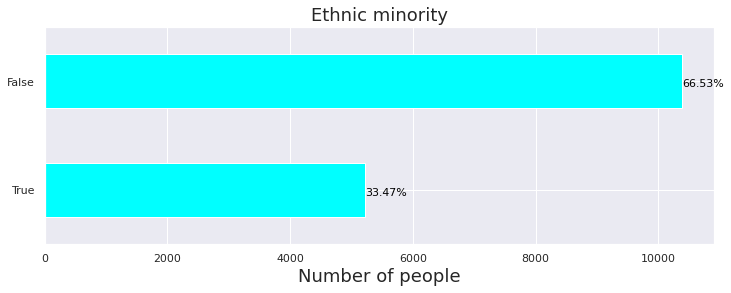

In [32]:
data['IsEthnicMinority'] = [bool(data['IsEthnicMinority'][i]) for i in range(len(data['IsEthnicMinority']))]
ax = data['IsEthnicMinority'].value_counts().plot.barh(color='cyan')
ax.set_title("Ethnic minority", fontsize=18)
ax.set_xlabel("Number of people", fontsize=18)
# create a list to collect the plt.patches data
totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# set individual bar lables using above list
total = sum(totals)
# set individual bar lables using above list
for i in ax.patches:
  if round((i.get_width()/total)*100, 2)>=1.4:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width(), i.get_y()+0.3, str(round((i.get_width()/total)*100, 2))+'%', fontsize=11, color='black')

# invert for largest on top 
ax.invert_yaxis()

<font color=blue|red|green|pink|yellow> More than a quarter of new coders are ethnic minorities.

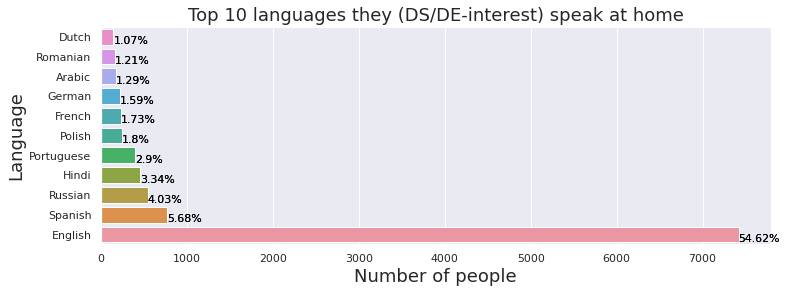

In [33]:
Language = data['LanguageAtHome'].value_counts()
language = pd.DataFrame({'Language': Language.index, 'Num': Language})
language = language.sort_values('Num', axis=0, ascending=False)
sel_language = language.head(11)

ax1 = sns.barplot(data = language, y='Language', x='Num')
# create a list to collect the plt.patches data
totals = []
# find the values and append to list
for i in ax1.patches:
    totals.append(i.get_width())
# set individual bar lables using above list
total = sum(totals)

# set figure size
sns.set(rc={'figure.figsize':(12, 4)})

ax = sns.barplot(data = sel_language, y='Language', x='Num')
ax.set_alpha(0.9)
ax.set_title("Top 10 languages they (DS/DE-interest) speak at home", fontsize=18)
ax.set_xlabel("Number of people", fontsize=18)
ax.set_ylabel('Language', fontsize=18)

# set individual bar lables using above list
for i in ax.patches:
  if round((i.get_width()/total)*100, 2)>=1:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width(), i.get_y()+0.03, str(round((i.get_width()/total)*100, 2))+'%', fontsize=11, color='black')

# invert for largest on top 
ax.invert_yaxis()

<font color=blue|red|green|pink|yellow> And almost half are non-native English speakers.

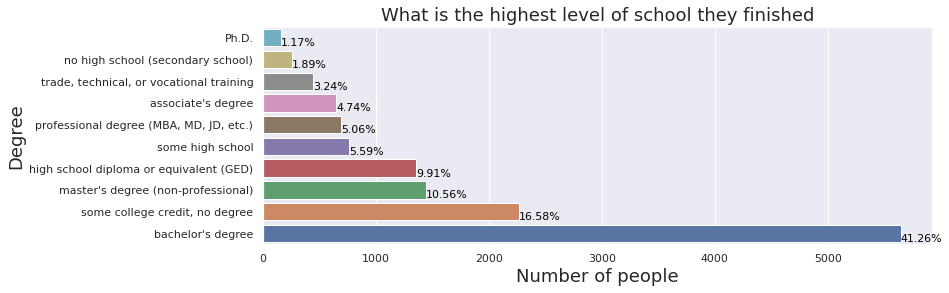

In [34]:
Degree = data['SchoolDegree'].value_counts()
degree = pd.DataFrame({'Degree': Degree.index, 'Num': Degree})
degree = degree.sort_values('Num', axis=0, ascending=False)

ax = sns.barplot(data = degree, y='Degree', x='Num')
# create a list to collect the plt.patches data
totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# set individual bar lables using above list
total = sum(totals)

# set figure size
sns.set(rc={'figure.figsize':(12, 4)})

#ax = sns.barplot(data = sel_degree, y='Degree', x='Num')
ax.set_alpha(0.9)
ax.set_title("What is the highest level of school they finished", fontsize=18)
ax.set_xlabel("Number of people", fontsize=18)
ax.set_ylabel('Degree', fontsize=18)

# set individual bar lables using above list
for i in ax.patches:
  #if round((i.get_width()/total)*100, 2)>=1:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width(), i.get_y()+0.03, str(round((i.get_width()/total)*100, 2))+'%', fontsize=11, color='black')

# invert for largest on top 
ax.invert_yaxis()

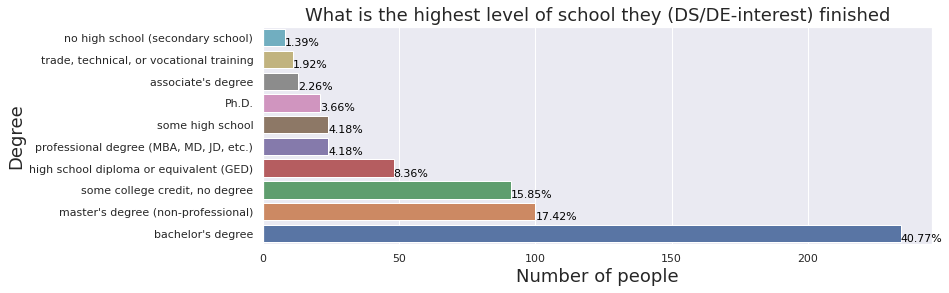

In [35]:
Degree = dt['SchoolDegree'].value_counts()
degree = pd.DataFrame({'Degree': Degree.index, 'Num': Degree})
degree = degree.sort_values('Num', axis=0, ascending=False)

ax = sns.barplot(data = degree, y='Degree', x='Num')
# create a list to collect the plt.patches data
totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# set individual bar lables using above list
total = sum(totals)

# set figure size
sns.set(rc={'figure.figsize':(12, 4)})

#ax = sns.barplot(data = sel_degree, y='Degree', x='Num')
ax.set_alpha(0.9)
ax.set_title("What is the highest level of school they (DS/DE-interest) finished", fontsize=18)
ax.set_xlabel("Number of people", fontsize=18)
ax.set_ylabel('Degree', fontsize=18)

# set individual bar lables using above list
for i in ax.patches:
  #if round((i.get_width()/total)*100, 2)>=1:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width(), i.get_y()+0.03, str(round((i.get_width()/total)*100, 2))+'%', fontsize=11, color='black')

# invert for largest on top 
ax.invert_yaxis()

<font color=blue|red|green|pink|yellow> Almost 50% have completed a bachelor's degree. Moreover, new coders being interested in DS/DE career completed higher education.

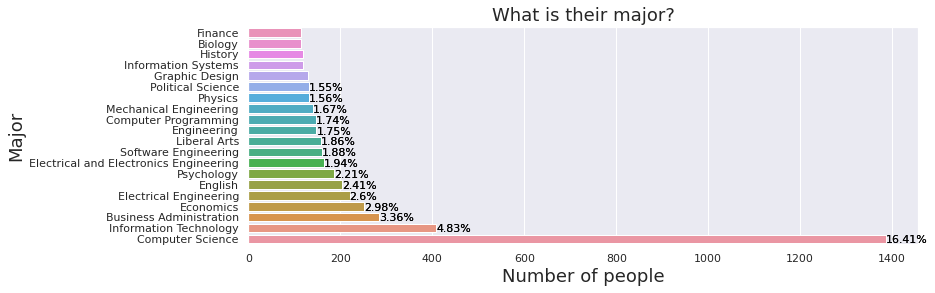

In [36]:
Major = data['SchoolMajor'].value_counts()
major = pd.DataFrame({'Major': Major.index, 'Num': Major})
major = major.sort_values('Num', axis=0, ascending=False)
sel_major = major.head(20)

ax1 = sns.barplot(data = major, y='Major', x='Num')
# create a list to collect the plt.patches data
totals = []
# find the values and append to list
for i in ax1.patches:
    totals.append(i.get_width())
# set individual bar lables using above list
total = sum(totals)

# set figure size
sns.set(rc={'figure.figsize':(12, 4)})

ax = sns.barplot(data = sel_major, y='Major', x='Num')
ax.set_alpha(0.9)
ax.set_title("What is their major?", fontsize=18)
ax.set_xlabel("Number of people", fontsize=18)
ax.set_ylabel('Major', fontsize=18)

# set individual bar lables using above list
for i in ax.patches:
  if round((i.get_width()/total)*100, 2)>1.54:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width(), i.get_y()+0.03, str(round((i.get_width()/total)*100, 2))+'%', fontsize=11, color='black')

# invert for largest on top 
ax.invert_yaxis()

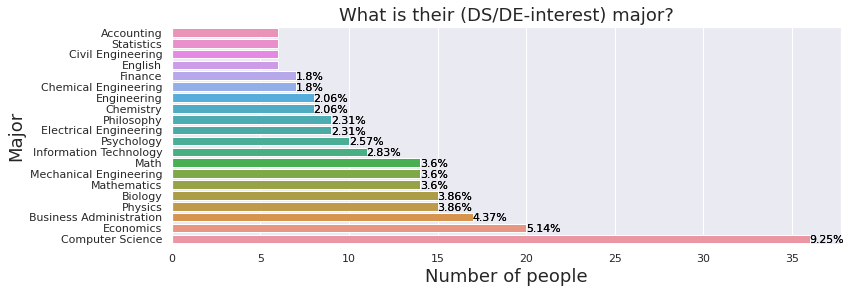

In [37]:
Major = dt['SchoolMajor'].value_counts()
major = pd.DataFrame({'Major': Major.index, 'Num': Major})
major = major.sort_values('Num', axis=0, ascending=False)
sel_major = major.head(20)

ax1 = sns.barplot(data = major, y='Major', x='Num')
# create a list to collect the plt.patches data
totals = []
# find the values and append to list
for i in ax1.patches:
    totals.append(i.get_width())
# set individual bar lables using above list
total = sum(totals)

# set figure size
sns.set(rc={'figure.figsize':(12, 4)})

ax = sns.barplot(data = sel_major, y='Major', x='Num')
ax.set_alpha(0.9)
ax.set_title("What is their (DS/DE-interest) major?", fontsize=18)
ax.set_xlabel("Number of people", fontsize=18)
ax.set_ylabel('Major', fontsize=18)

# set individual bar lables using above list
for i in ax.patches:
  if round((i.get_width()/total)*100, 2)>1.54:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width(), i.get_y()+0.03, str(round((i.get_width()/total)*100, 2))+'%', fontsize=11, color='black')

# invert for largest on top 
ax.invert_yaxis()

<font color=blue|red|green|pink|yellow> Computer Science and Economics were the two most popular majors among DS/DE-interest people, while Computer Science and Information Technology were two most popular majors among population.

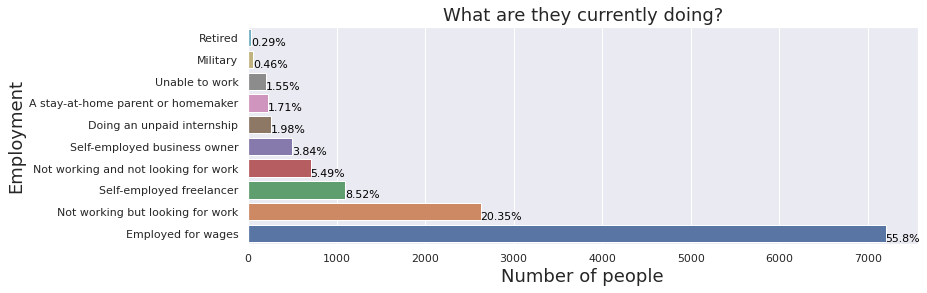

In [38]:
Employment = data['EmploymentStatus'].value_counts()
employment = pd.DataFrame({'Employment': Employment.index, 'Num': Employment})
employment = employment.sort_values('Num', axis=0, ascending=False)

ax = sns.barplot(data = employment, y='Employment', x='Num')
# create a list to collect the plt.patches data
totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# set individual bar lables using above list
total = sum(totals)

# set figure size
sns.set(rc={'figure.figsize':(12, 4)})

ax.set_alpha(0.9)
ax.set_title("What are they currently doing?", fontsize=18)
ax.set_xlabel("Number of people", fontsize=18)
ax.set_ylabel('Employment', fontsize=18)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width(), i.get_y()+0.03, str(round((i.get_width()/total)*100, 2))+'%', fontsize=11, color='black')

# invert for largest on top 
ax.invert_yaxis()

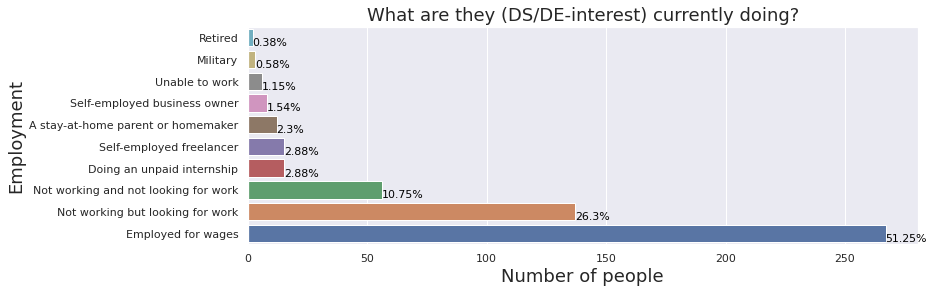

In [39]:
Employment = dt['EmploymentStatus'].value_counts()
employment = pd.DataFrame({'Employment': Employment.index, 'Num': Employment})
employment = employment.sort_values('Num', axis=0, ascending=False)

ax = sns.barplot(data = employment, y='Employment', x='Num')
# create a list to collect the plt.patches data
totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# set individual bar lables using above list
total = sum(totals)

# set figure size
sns.set(rc={'figure.figsize':(12, 4)})

ax.set_alpha(0.9)
ax.set_title("What are they (DS/DE-interest) currently doing?", fontsize=18)
ax.set_xlabel("Number of people", fontsize=18)
ax.set_ylabel('Employment', fontsize=18)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width(), i.get_y()+0.03, str(round((i.get_width()/total)*100, 2))+'%', fontsize=11, color='black')

# invert for largest on top 
ax.invert_yaxis()

<font color=blue|red|green|pink|yellow> Just over 50% are currently working.

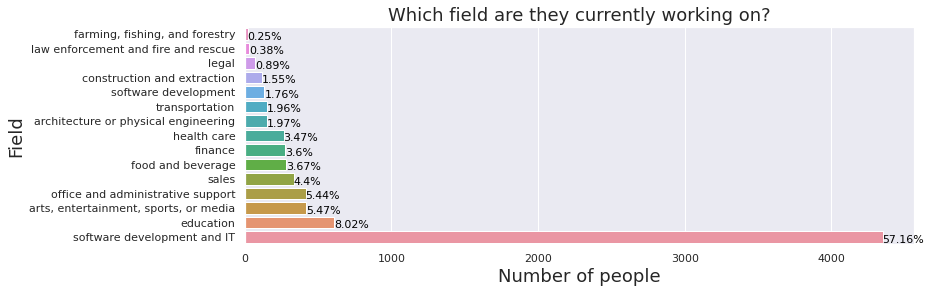

In [40]:
Field = data['EmploymentField'].value_counts()
field = pd.DataFrame({'Field': Field.index, 'Num': Field})
field = field.sort_values('Num', axis=0, ascending=False)

ax = sns.barplot(data = field, y='Field', x='Num')
# create a list to collect the plt.patches data
totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# set individual bar lables using above list
total = sum(totals)

# set figure size
sns.set(rc={'figure.figsize':(12, 4)})

ax.set_alpha(0.9)
ax.set_title("Which field are they currently working on?", fontsize=18)
ax.set_xlabel("Number of people", fontsize=18)
ax.set_ylabel('Field', fontsize=18)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width(), i.get_y()+0.03, str(round((i.get_width()/total)*100, 2))+'%', fontsize=11, color='black')

# invert for largest on top 
ax.invert_yaxis()

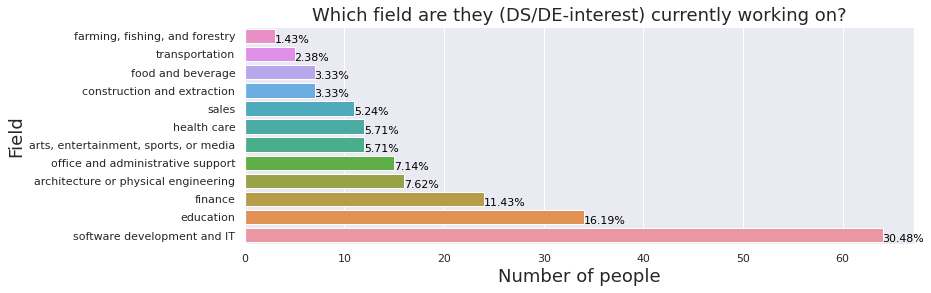

In [41]:
Field = dt['EmploymentField'].value_counts()
field = pd.DataFrame({'Field': Field.index, 'Num': Field})
field = field.sort_values('Num', axis=0, ascending=False)

ax = sns.barplot(data = field, y='Field', x='Num')
# create a list to collect the plt.patches data
totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# set individual bar lables using above list
total = sum(totals)

# set figure size
sns.set(rc={'figure.figsize':(12, 4)})

ax.set_alpha(0.9)
ax.set_title("Which field are they (DS/DE-interest) currently working on?", fontsize=18)
ax.set_xlabel("Number of people", fontsize=18)
ax.set_ylabel('Field', fontsize=18)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width(), i.get_y()+0.03, str(round((i.get_width()/total)*100, 2))+'%', fontsize=11, color='black')

# invert for largest on top 
ax.invert_yaxis()

<font color=blue|red|green|pink|yellow> More than 50% are currently working in tech while only 30% DS/DE-interest people are currently working in tech.

In [42]:
pd.DataFrame({'population': data['Income'].quantile([0, .25, .5, .75, 1]), 'DS/DE': dt['Income'].quantile([0, .25, .5, .75, 1])})

,population,DS/DE
0.00,6000.0,6000.0
0.25,20000.0,25000.0
0.50,37000.0,43600.0
0.75,60000.0,60000.0
1.00,200000.0,200000.0


<font color=blue|red|green|pink|yellow> The median salary for DS/DE-interest people is $44k that is higher than the median salary of population.

In [43]:
pd.DataFrame({'population': data['IsUnderEmployed'].value_counts(normalize=True), 'DS/DE': dt['IsUnderEmployed'].value_counts(normalize=True)})

,population,DS/DE
0.0,0.578253,0.529412
1.0,0.421747,0.470588


<font color=blue|red|green|pink|yellow> 47% DS/DE-interest people are underemployed, which 5% higher than population.

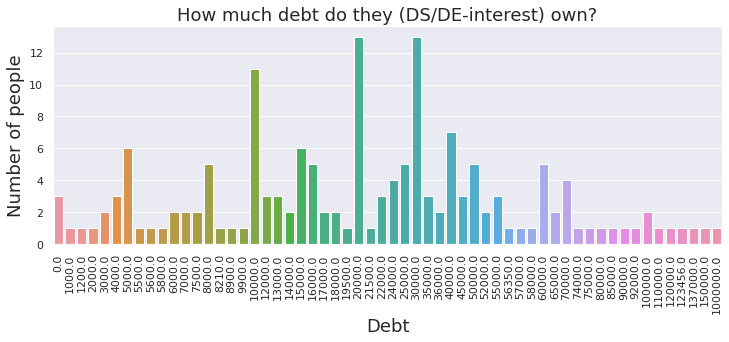

In [44]:
Debt = dt['StudentDebtOwe'].value_counts()
Debt = pd.DataFrame({'Debt': Debt.index, 'Num': Debt})
Debt = Debt.sort_values('Debt', axis=0, ascending=False)

ax = sns.barplot(data = Debt, x='Debt', y='Num')
# set figure size
sns.set(rc={'figure.figsize':(12, 4)})

ax.set_alpha(0.9)
ax.set_title("How much debt do they (DS/DE-interest) own?", fontsize=18)
ax.set_ylabel("Number of people", fontsize=18)
ax.set_xlabel('Debt', fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [45]:
pd.DataFrame({'population': data['StudentDebtOwe'].quantile([0, .25, .5, .75, 1]), 'DS/DE': dt['StudentDebtOwe'].quantile([0, .25, .5, .75, 1])})

,population,DS/DE
0.00,0.0,0.0
0.25,10000.0,10000.0
0.50,20000.0,20000.0
0.75,40000.0,45000.0
1.00,1000000.0,1000000.0


<font color=blue|red|green|pink|yellow> The median student loan is $20k.

### Some questions after doing univariate plots
* What is/are the main feature(s) of interest in your dataset?

It depends on the questions we are interested in. For example, if we are interested in career earnings and career satisfaction, we may do other surveys of the same people, and build a predictive model.

* What other features in the dataset do you think will help support your investigation into your features of interest?

We can separate people who answered something other than DS/DE-related to the job role interest question and compare the subsets using bivariate and multivariate plots.

I will also explore several of the smaller features, six of them numerical and four of them categorical.

The numerical:
1. Age
2. Programming experience
3. Hours of learning weekly
4. Income
5. Expected earning
6. Student debt remaining

The categorical:
1. Gender
2. Citizenship by continent
3. School degree
4. Ethnic majority vs. minority

* Of the features you investigated, were there any unusual distributions?

There is a lot of long-tail data that requires transformation to view the details of the distribution. Programming experience, for example, is really positively skewed. Some people have coded for one month while some others for 20+ years.

There is no DS/DE-interest people want to be a freelancer or start their own business.

* Did you perform any operations on the data to tidy, adjust or change the form of the data? If so, why did you do this?

Yes, in-person code event, employment field...





## Bivariate plots

In [46]:
data.columns

Index(['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampFullJobAfter',
       'BootcampLoanYesNo', 'BootcampMonthsAgo', 'BootcampName',
       'BootcampPostSalary', 'BootcampRecommend', 'ChildrenNumber',
       ...
       'ResourceSoloLearn', 'ResourceStackOverflow', 'ResourceTreehouse',
       'ResourceUdacity', 'ResourceUdemy', 'ResourceW3Schools',
       'ResourceYouTube', 'SchoolDegree', 'SchoolMajor', 'StudentDebtOwe'],
      dtype='object', length=113)

In [47]:
num_cols = ['Age', 'MonthsProgramming', 'HoursLearning', 'Income', 'ExpectedEarning', 'StudentDebtOwe']
cat_cols = ['Gender','CountryCitizen','SchoolDegree','IsEthnicMinority']
num_data = data[num_cols]

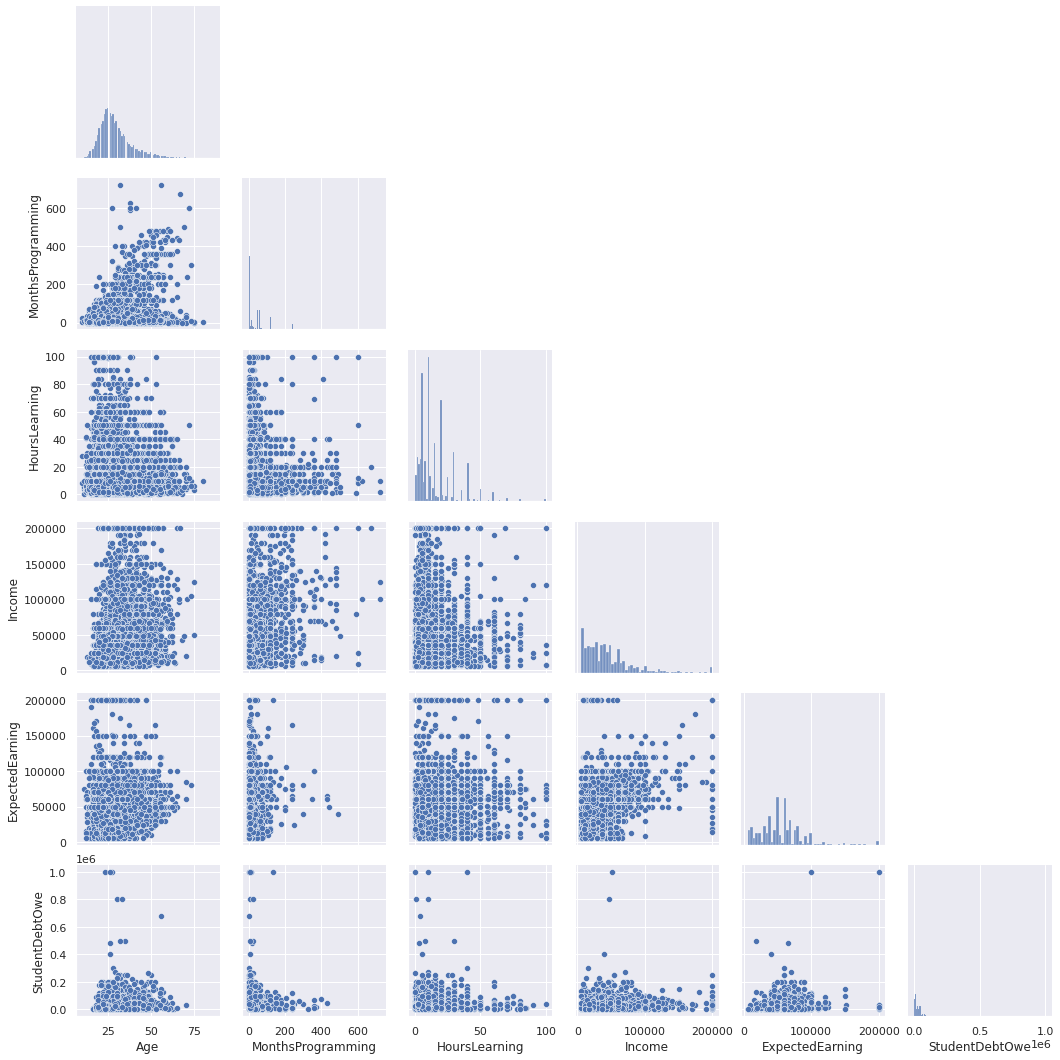

In [48]:
sns.pairplot(num_data, corner=True)

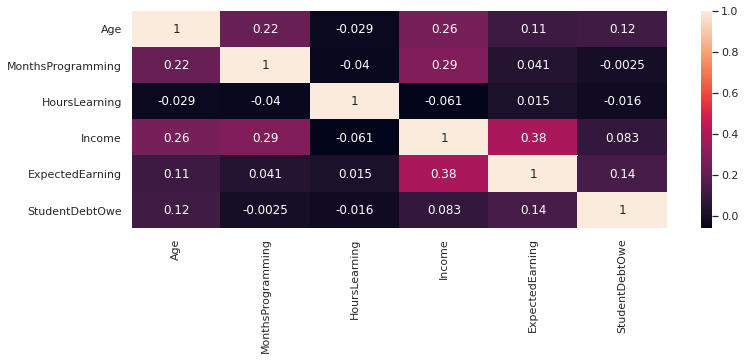

In [49]:
sns.heatmap(num_data.corr(), annot=True)

All correlations are below 0.4. The strongest of the correlations are:
* Income and ExpectedLearning (0.38)
* Income and MothsProgramming (0.29)
* Income and age (0.26)

They are intuitive, but not groundbreaking: you tend to expect your next job to have a high salary if your current one does, or you have more experiences; and you tend to make more money when you are older.

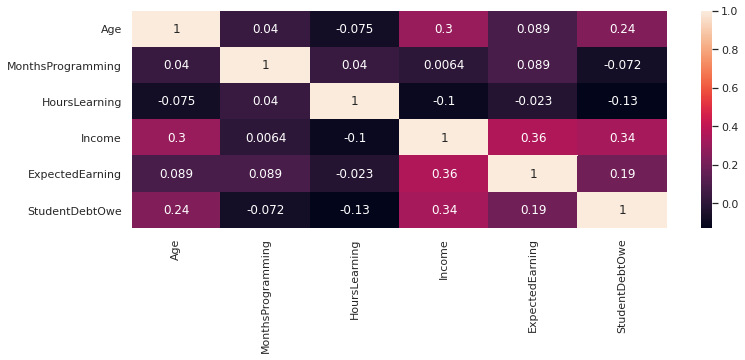

In [50]:
sns.heatmap(dt[num_cols].corr(), annot=True)

For DS/DE-interest group, all correlations are also below 0.4. Looking at the top 3 strongest correlation, all involve Income, however, something is interesting:
* Income and StudentDebtOwe (0.34) 

It is reasonable when looking back to the school degree analysis: DS/DE-interest group tend to complete higher education than population, which leads to higher student debt. As a result, they expect higher salary.


### Learning hours per week, Expected earning, and Gender 

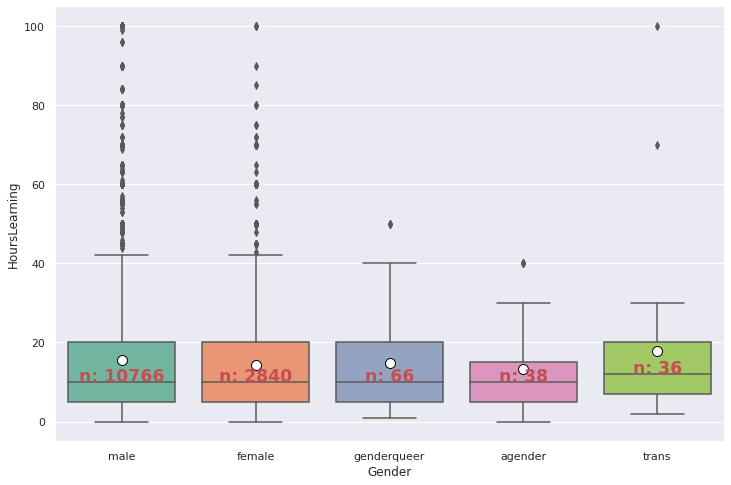

In [51]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(x='Gender', y='HoursLearning', data=data, showmeans=True, 
                 meanprops={"marker":"o", "markerfacecolor":"white", 
                            "markeredgecolor":"black", "markersize":"10"},
                 palette='Set2')

# Calculate number of obs per group & median to position labels
medians = data.groupby(['Gender'])['HoursLearning'].median().values
nobs = data['Gender'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick],
            medians[tick] + 0.1,
            nobs[tick],
            horizontalalignment='center',
            size='x-large',
            color='r',
            weight='semibold')
 
plt.show()

The plot shows that transgender new coders spend more time on learning.

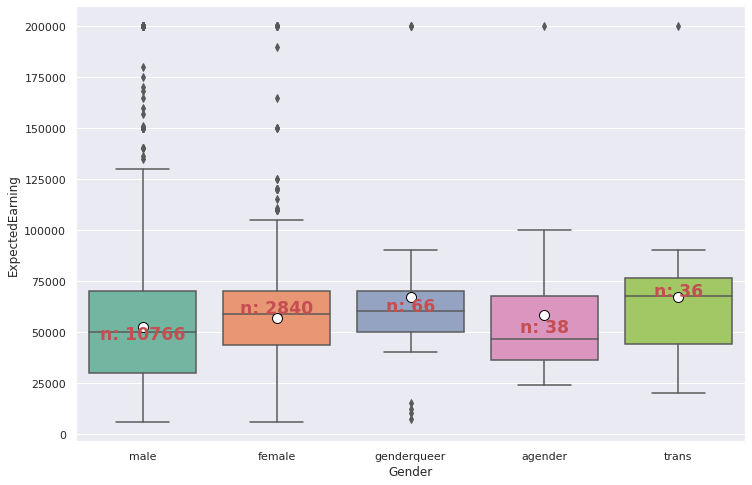

In [52]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(x='Gender', y='ExpectedEarning', data=data, showmeans=True, 
                 meanprops={"marker":"o", "markerfacecolor":"white", 
                            "markeredgecolor":"black", "markersize":"10"},
                 palette='Set2')

# Calculate number of obs per group & median to position labels
medians = data.groupby(['Gender'])['ExpectedEarning'].median().values
nobs = data['Gender'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick],
            medians[tick] + 0.1,
            nobs[tick],
            horizontalalignment='center',
            size='x-large',
            color='r',
            weight='semibold')
 
plt.show()

Females expect higher salaries than males, with a \$9k gap in medians and a \$4k gap in means. Looking closer to the quartiles: in the first quartiles, there is a huge gap - \$14k. 

In [53]:
data[data['Gender']=='male']['ExpectedEarning'].quantile([0, 0.25,0.5,0.75, 1])
data[data['Gender']=='female']['ExpectedEarning'].quantile([0, 0.25,0.5,0.75, 1])

0.00      6000.0
0.25     43650.0
0.50     59000.0
0.75     70000.0
1.00    200000.0
Name: ExpectedEarning, dtype: float64

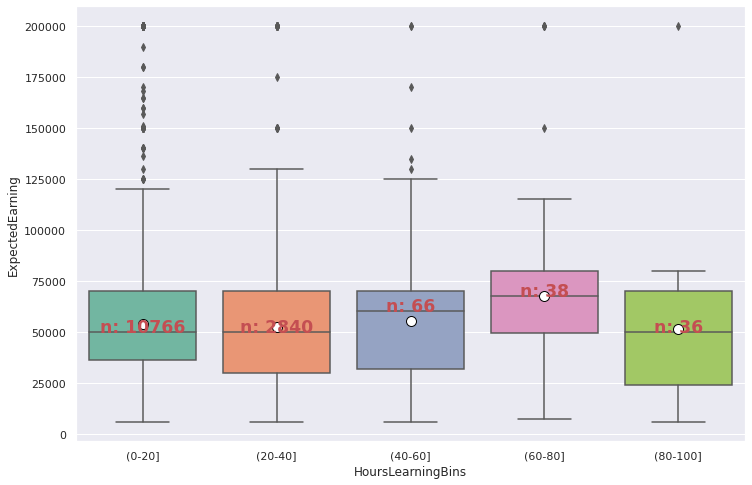

In [54]:
data['HoursLearningBins'] = pd.cut(data['HoursLearning'], bins=5, labels=False)
plt.figure(figsize=(12,8))
ax = sns.boxplot(x='HoursLearningBins', y='ExpectedEarning', data=data, showmeans=True, 
                 meanprops={"marker":"o", "markerfacecolor":"white", 
                            "markeredgecolor":"black", "markersize":"10"},
                 palette='Set2')

# Calculate number of obs per group & median to position labels
medians = data.groupby(['HoursLearningBins'])['ExpectedEarning'].median().values
nobs = data['Gender'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick],
            medians[tick] + 0.1,
            nobs[tick],
            horizontalalignment='center',
            size='x-large',
            color='r',
            weight='semibold')

bins = ['(0-20]','(20-40]', '(40-60]', '(60-80]', '(80-100]']
ax.set_xticklabels(bins)
plt.show()

Most of new coders spent less than 40 hours and there is almost no much difference between the first two groups. 

Less than 5% new coders spent more than 40 hours on learning. It is reasonable that they expected higher earning. 

Also, looking at the below plot, the younger new coders are, the more hours they spend on learning.

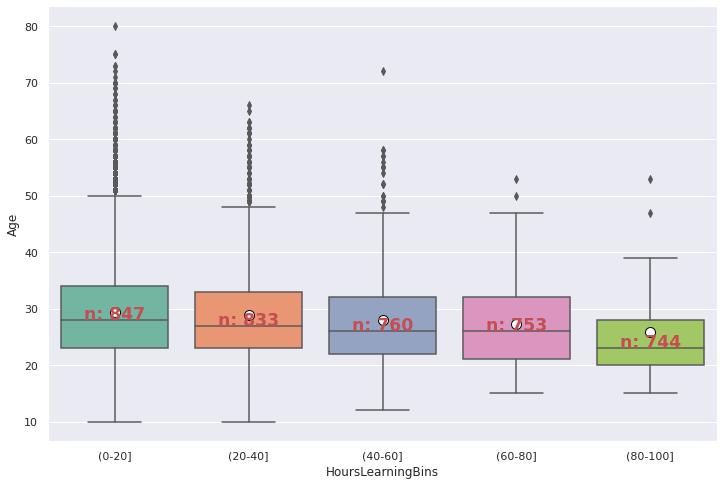

In [55]:
data['HoursLearningBins'] = pd.cut(data['HoursLearning'], bins=5, labels=False)
plt.figure(figsize=(12,8))
ax = sns.boxplot(x='HoursLearningBins', y='Age', data=data, showmeans=True, 
                 meanprops={"marker":"o", "markerfacecolor":"white", 
                            "markeredgecolor":"black", "markersize":"10"},
                 palette='Set2')

# Calculate number of obs per group & median to position labels
medians = data.groupby(['HoursLearningBins'])['Age'].median().values
nobs = data['Age'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick],
            medians[tick] + 0.1,
            nobs[tick],
            horizontalalignment='center',
            size='x-large',
            color='r',
            weight='semibold')

bins = ['(0-20]','(20-40]', '(40-60]', '(60-80]', '(80-100]']
ax.set_xticklabels(bins)
plt.show()

###  Country citizenship.

In [56]:
dt['CountryCitizen'].unique()

array(['Jamaica', 'United States of America', 'Belgium', 'United Kingdom',
       'Ireland', 'Italy', 'Canada', 'Colombia', 'Australia', 'Guatemala',
       'India', 'Sweden', 'Korea South', 'Trinidad & Tobago', 'Russia',
       'Mexico', nan, 'Netherlands (Holland, Europe)', 'Egypt', 'Spain',
       'Portugal', 'Pakistan', 'Poland', 'Brazil', 'Virgin Islands (USA)',
       'South Africa', 'Germany', 'Kazakhstan', 'Indonesia', 'Albania',
       'Morocco', 'Japan', 'Hong Kong', 'Iceland', 'Ukraine', 'Serbia',
       'Bulgaria', 'Taiwan', 'China', 'Denmark', 'Nigeria', 'Austria',
       'Romania', 'Malaysia', 'Greece', 'Chile', 'Korea North', 'Israel',
       'Turkey', 'Venezuela', 'Vietnam', 'New Zealand', 'Philippines',
       'Lithuania', 'Cyprus', 'Antigua & Barbuda', 'Estonia', 'France',
       'Singapore', 'Switzerland', 'Norway', 'Bangladesh',
       'Bosnia & Herzegovina', 'Tunisia', 'Thailand', 'Peru', 'Finland',
       'Hungary', 'Cuba', 'Iran', 'Ecuador', 'Moldova', 'Croatia',

### Job role of interest 

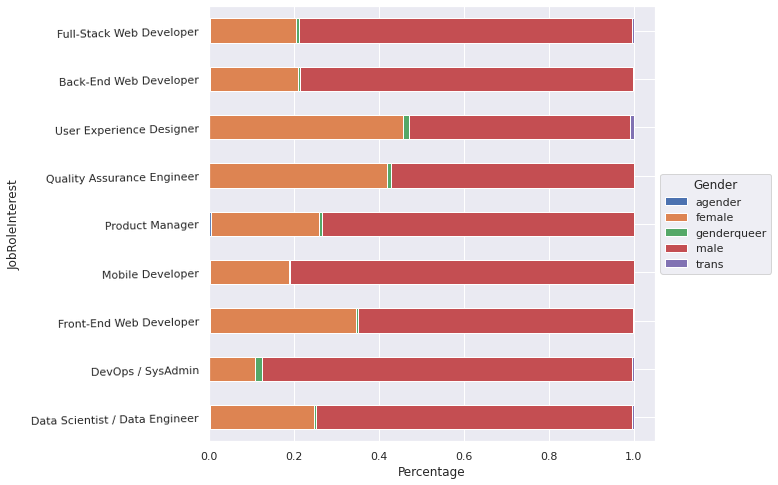

In [57]:
df = data[['Gender', 'JobRoleInterest']]
df1 = df.groupby(['Gender', 'JobRoleInterest']).size()
df2 = df1.unstack('Gender').T
df2 = df2.div(df2.sum())

f = plt.figure()
df2.T.plot(kind='barh', stacked=True, rot=1, figsize=(8, 8), ax=f.gca())
plt.legend(title='Gender', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Percentage')
plt.show()

DevOps/SysAdmin is the most male-dominated position at 90% while User Experience Designer is the most diverse position in terms of gender.

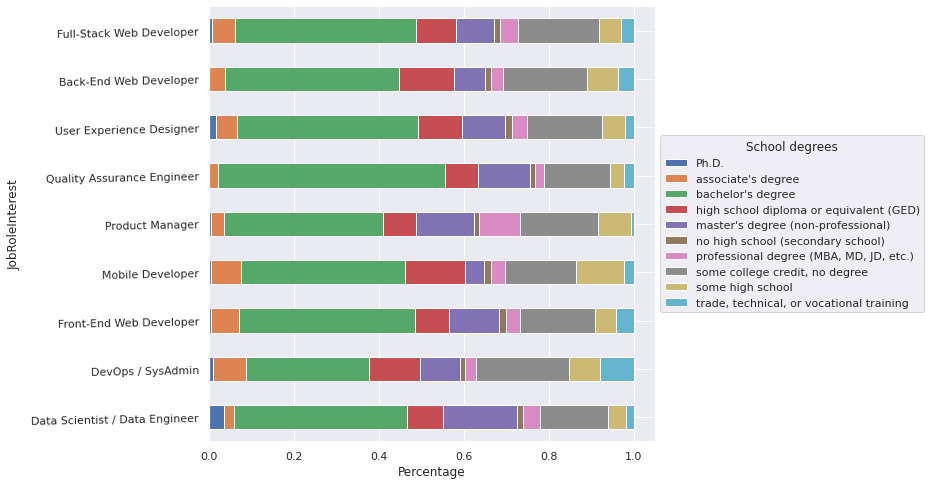

In [58]:
df = data[['SchoolDegree', 'JobRoleInterest']]
df1 = df.groupby(['SchoolDegree', 'JobRoleInterest']).size()
df2 = df1.unstack('SchoolDegree').T
df2 = df2.div(df2.sum())

f = plt.figure()
df2.T.plot(kind='barh', stacked=True, rot=1, figsize=(8, 8), ax=f.gca())
plt.legend(title='School degrees', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Percentage')
plt.show()

The percentage of Ph.D and master degrees is the highest for data scientist and data engineer while the percentage of professional degree is the highest for product manager. Mobile developer, devOps/SysAdmin, and Back-end web developer have the highest percentage of new coders with no, some, or only a high school education.

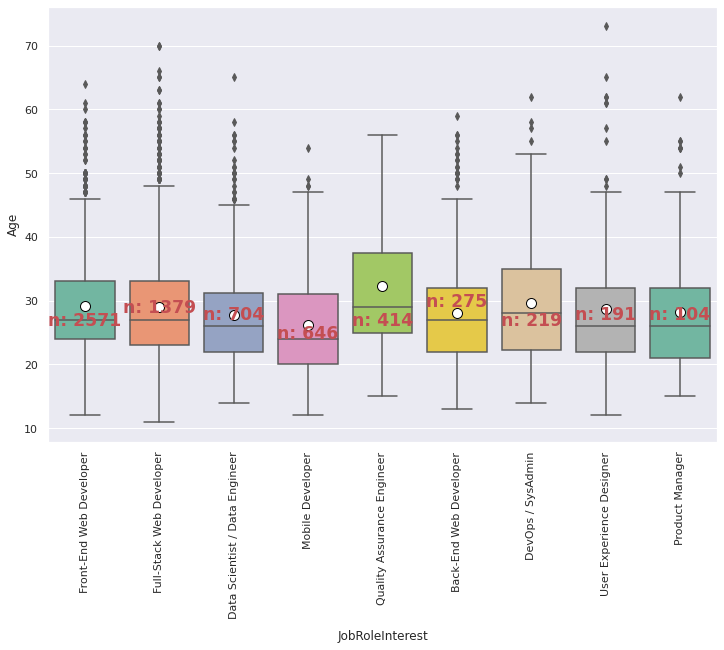

In [59]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(x='JobRoleInterest', y='Age', data=data, showmeans=True, 
                 meanprops={"marker":"o", "markerfacecolor":"white", 
                            "markeredgecolor":"black", "markersize":"10"},
                 palette='Set2')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

# Calculate number of obs per group & median to position labels
medians = data.groupby(['JobRoleInterest'])['Age'].median().values
nobs = data['JobRoleInterest'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick],
            medians[tick] + 0.1,
            nobs[tick],
            horizontalalignment='center',
            size='x-large',
            color='r',
            weight='semibold')
 
plt.show()

Mobile developers are the youngest with the first quartile while Quality Assurance Engineer are the oldest in all quartiles and with a median age of 30 years.

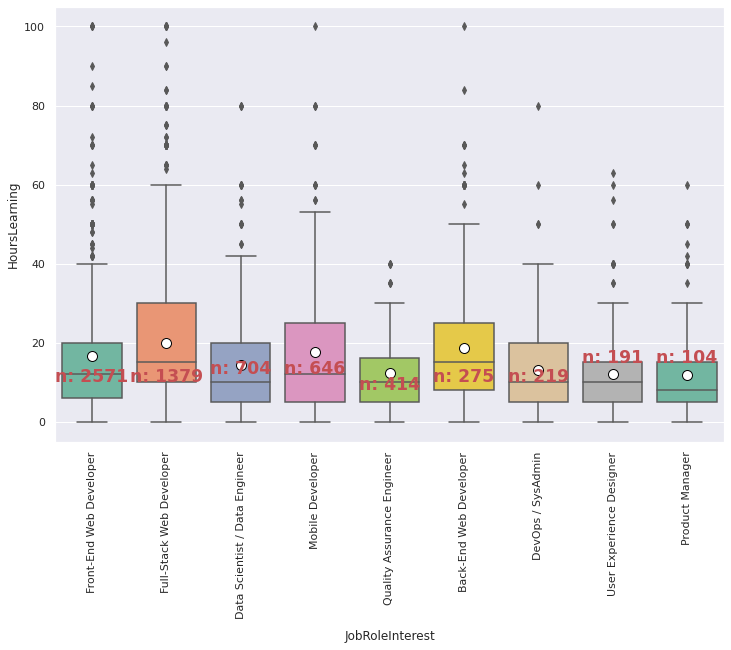

In [60]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(x='JobRoleInterest', y='HoursLearning', data=data, showmeans=True, 
                 meanprops={"marker":"o", "markerfacecolor":"white", 
                            "markeredgecolor":"black", "markersize":"10"},
                 palette='Set2')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

# Calculate number of obs per group & median to position labels
medians = data.groupby(['JobRoleInterest'])['HoursLearning'].median().values
nobs = data['JobRoleInterest'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick],
            medians[tick] + 0.1,
            nobs[tick],
            horizontalalignment='center',
            size='x-large',
            color='r',
            weight='semibold')
 
plt.show()

Full-stack web developers spent the most time on learning each week with a mean hours of 20, while product manager spent the least amount of time learning per week with a median of 10 hours.

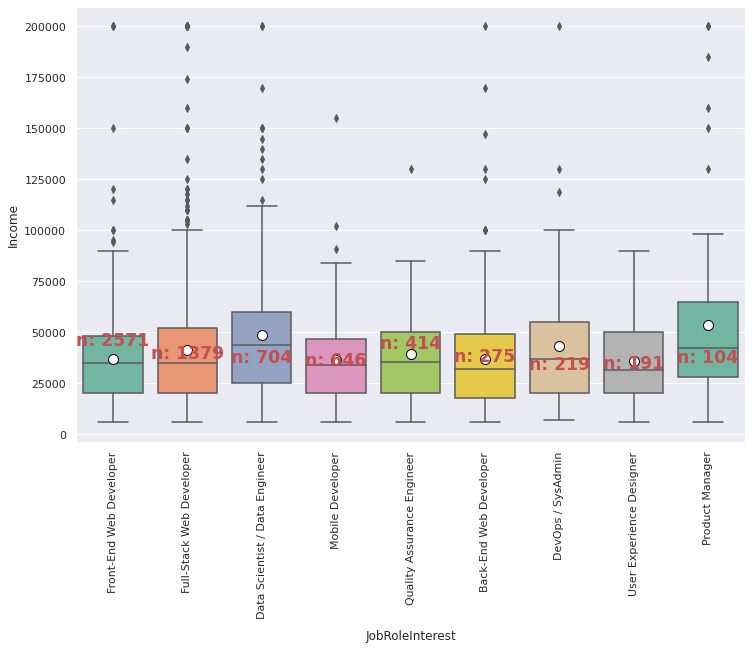

In [61]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(x='JobRoleInterest', y='Income', data=data, showmeans=True, 
                 meanprops={"marker":"o", "markerfacecolor":"white", 
                            "markeredgecolor":"black", "markersize":"10"},
                 palette='Set2')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

# Calculate number of obs per group & median to position labels
medians = data.groupby(['JobRoleInterest'])['Income'].median().values
nobs = data['JobRoleInterest'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick],
            medians[tick] + 0.1,
            nobs[tick],
            horizontalalignment='center',
            size='x-large',
            color='r',
            weight='semibold')
 
plt.show()

New coders interested in product manager and data science/data engineer cleary have the highest current income.

Of course, the corresponding expected salaries are the highest in product manager and data science/data engineer groups.

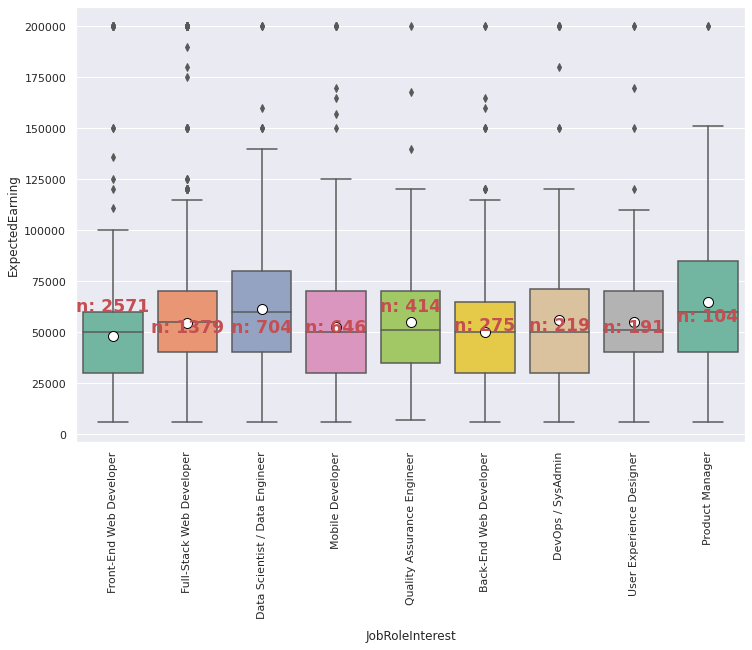

In [62]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(x='JobRoleInterest', y='ExpectedEarning', data=data, showmeans=True, 
                 meanprops={"marker":"o", "markerfacecolor":"white", 
                            "markeredgecolor":"black", "markersize":"10"},
                 palette='Set2')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

# Calculate number of obs per group & median to position labels
medians = data.groupby(['JobRoleInterest'])['ExpectedEarning'].median().values
nobs = data['JobRoleInterest'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick],
            medians[tick] + 0.1,
            nobs[tick],
            horizontalalignment='center',
            size='x-large',
            color='r',
            weight='semibold')
 
plt.show()

### Bivariate analysis

* In general, the correlation between current income and age is stronger than the correlation between expected earning and age for new coders.
* Females expected higher earnings than males. These who spent more than 40 hours on learning per week expected higher earnings.
* Percentage of new coders interested in data science/data engineer possess post-graduate degrees (Ph.D and Master) is highest.

median_age_female =  28.0 median_age_male =  27.0
median_income_female =  38000.0 median_income_male =  36000.0


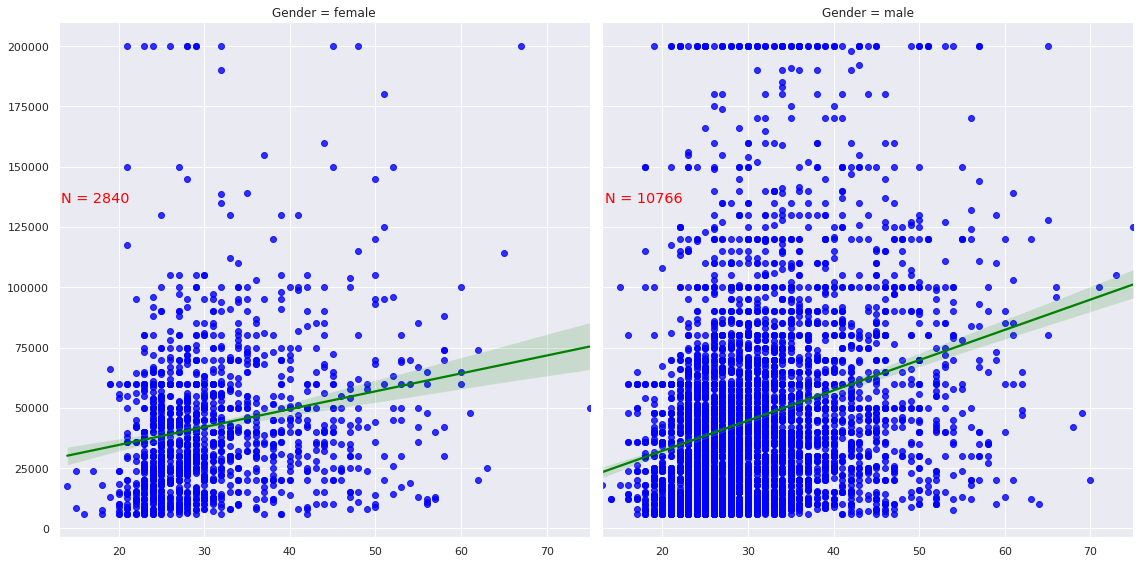

In [63]:
def annotate(data, **kws):
    n = len(data)
    ax = plt.gca()
    ax.text(.005, .65, f"N = {n}", transform=ax.transAxes, fontsize='large', color='red')

median_income_female = data.loc[data['Gender']=='female']['Income'].median()
median_age_female = data.loc[data['Gender']=='female']['Age'].median()
median_income_male = data.loc[data['Gender']=='male']['Income'].median()
median_age_male = data.loc[data['Gender']=='male']['Age'].median()
print('median_age_female = ', median_age_female, 'median_age_male = ', median_age_male)
print('median_income_female = ', median_income_female, 'median_income_male = ',  median_income_male)

df = pd.concat([data.loc[data['Gender']=='female'], data.loc[data['Gender']=='male']])
g = sns.FacetGrid(df, col="Gender", height=8) 
g.map_dataframe(sns.regplot, x='Age', y='Income', scatter_kws={"color": "blue"}, line_kws={"color": "green"}) 
g.set_axis_labels('Age', 'Income')
g.map_dataframe(annotate)

New coders are dominant by male since the number of female new coders is much smaller than male. Female new coders is slightly older and they earn higher income than male new coders. Looking at the trend (green line), female incomes tend to increase with age less than male.

As expected, female new coders expect higher salary. The following plot shows that there is not much of a relationship between expected earning and age and the correlation between them are similar across genders.

median_ExpectedEarning_female =  38000.0 median_ExpectedEarning_male =  36000.0


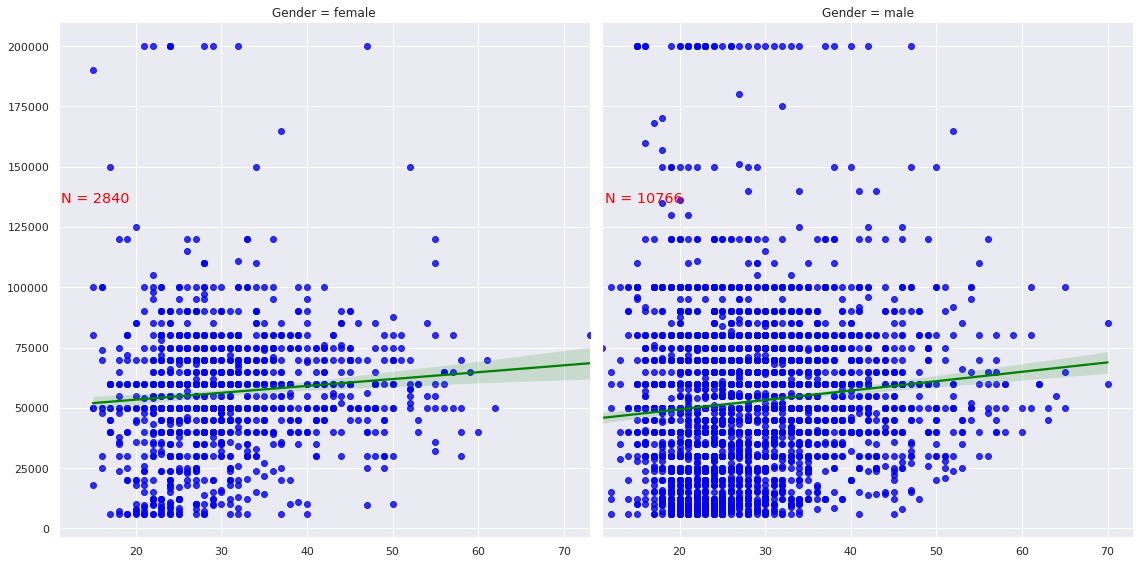

In [64]:
median_ExpectedEarning_female = data.loc[data['Gender']=='female']['ExpectedEarning'].median()
median_ExpectedEarning_male = data.loc[data['Gender']=='male']['ExpectedEarning'].median()
print('median_ExpectedEarning_female = ', median_income_female, 'median_ExpectedEarning_male = ',  median_income_male)

g = sns.FacetGrid(df, col="Gender", height=8) 
g.map_dataframe(sns.regplot, x='Age', y='ExpectedEarning', scatter_kws={"color": "blue"}, line_kws={"color": "green"}) 
g.set_axis_labels('Age', 'ExpectedEarning')
g.map_dataframe(annotate)

## Radar plot 


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (21,57) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


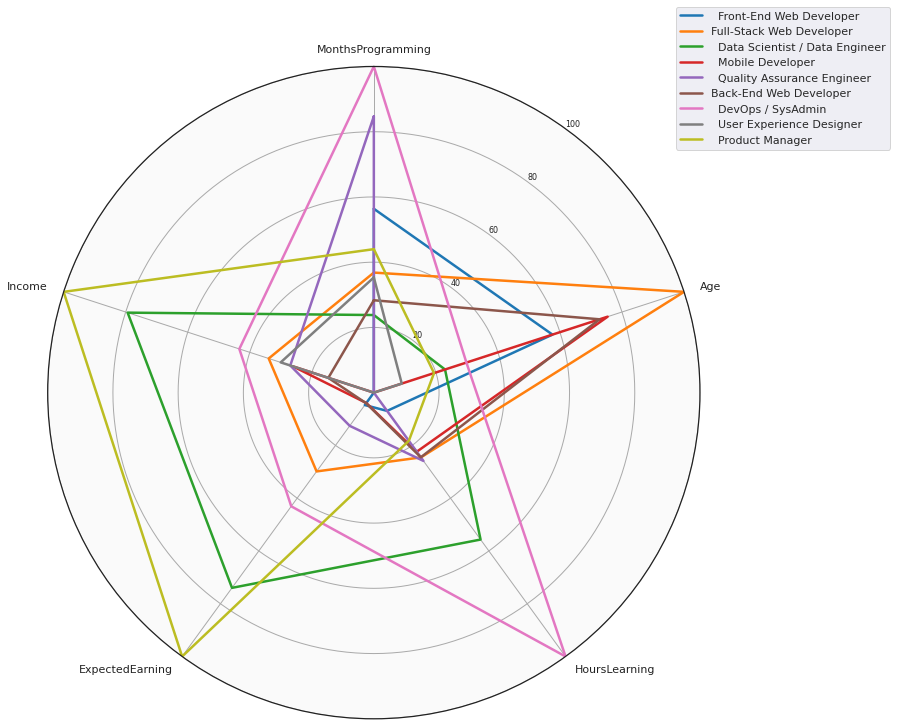

In [65]:
data = pd.read_csv('/content/sample_data/2016-FCC-New-Coders-Survey-Data.csv')
dat = data.loc[:,['JobRoleInterest', 'MonthsProgramming', 'Age', 'HoursLearning', 'ExpectedEarning', 'Income']]
dat = dat.dropna(axis=0)
df = dat.groupby('JobRoleInterest').mean()
# number of variables
categories = list(df)[1:]
N = len(categories)

# The attributes we want to use in our radar plot.
factors = ['MonthsProgramming', 'Age', 'HoursLearning', 'ExpectedEarning', 'Income']

# New scale should be from 0 to 100.
new_max = 100
new_min = 0
new_range = new_max - new_min

# Do a linear transformation on each variable to change value to [0, 100].
for factor in factors:
  max_val = df[factor].max()
  min_val = df[factor].min()
  val_range = max_val - min_val
  df[factor + '_Adj'] = df[factor].apply(lambda x: (((x - min_val) * new_range) / val_range) + new_min)

# Trim down to cols we want and rename to be nicer.
dft = df.loc[:, ['Age_Adj', 'HoursLearning_Adj', 'MonthsProgramming_Adj', 'Income_Adj', 'ExpectedEarning_Adj']]

dft.rename(columns={
    'MonthsProgramming_Adj': 'MonthsProgramming',
    'Age_Adj': 'Age',
    'HoursLearning_Adj': 'HoursLearning',
    'ExpectedEarning_Adj': 'ExpectedEarning',
    'Income_Adj': 'Income'
}, inplace=True)

dft.head()

# Each attribute we'll plot in the radar chart.
labels = ['MonthsProgramming', 'Age', 'HoursLearning', 'ExpectedEarning', 'Income']

# Number of variables we're plotting.
num_vars = len(labels)

# Split the circle into even parts and save the angles, so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop" and append the start value to the end.
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True))

# Helper function to plot each car on the radar chart.
def add_to_radar(Job, color):
  values = dft.loc[Job].tolist()
  values += values[:1]
  ax.plot(angles, values, color=color, linewidth=2.5, label=Job)
  #ax.fill(angles, values, color=color, alpha=0.25)

# Add each job to the chart.
jobs = list(data['JobRoleInterest'].unique())[1:]
import matplotlib.colors as mcolors
colors = list(mcolors.TABLEAU_COLORS.values())

for i in range(9):
  add_to_radar(jobs[i], colors[i])

# Fix axis to go in the right order and start at 12 o'clock.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles), labels)

# Go through labels and adjust alignment based on where it is in the circle.
for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')

# Ensure radar goes from 0 to 100.
ax.set_ylim(0, 100)
# You can also set gridlines manually like this:
# ax.set_rgrids([20, 40, 60, 80, 100])

# Set position of y-labels (0-100) to be in the middle of the first two axes.
ax.set_rlabel_position(180 / num_vars)

# Add some custom styling.
# Change the color of the tick labels.
ax.tick_params(colors='#222222')
# Make the y-axis (0-100) labels smaller.
ax.tick_params(axis='y', labelsize=8)
# Change the color of the circular gridlines.
ax.grid(color='#AAAAAA')
# Change the color of the outermost gridline (the spine).
ax.spines['polar'].set_color('#222222')
# Change the background color inside the circle itself.
ax.set_facecolor('#FAFAFA')

# Add a legend as well.
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

Look at the plot, we can see: 
* Product manager and Data scientist/ engineer lead the income and expected salary
* DevOps/ SysAdmin leads the months of programming (progamming experience) and the hours of learning
* Full-stack developer is the oldest.

To analyze further other patterns for each job is a bit difficult due to overlapping. Let do one plot per job.

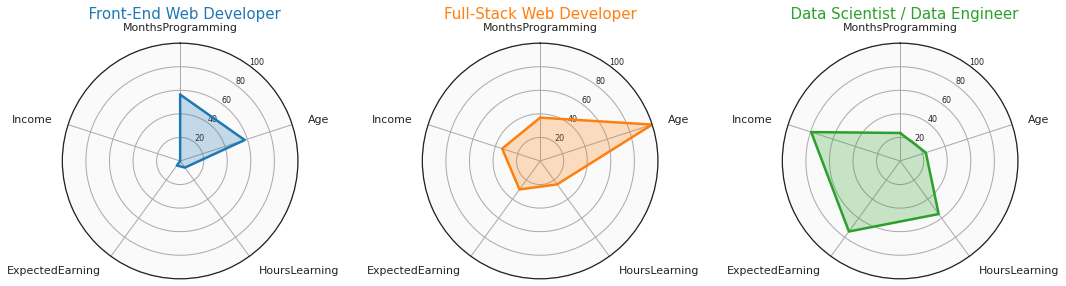

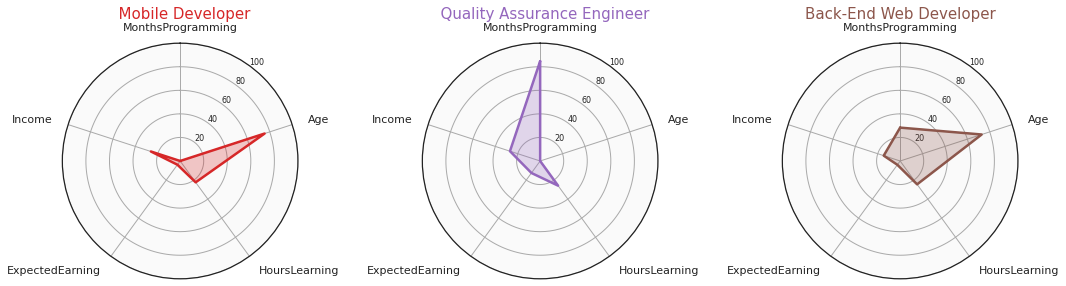

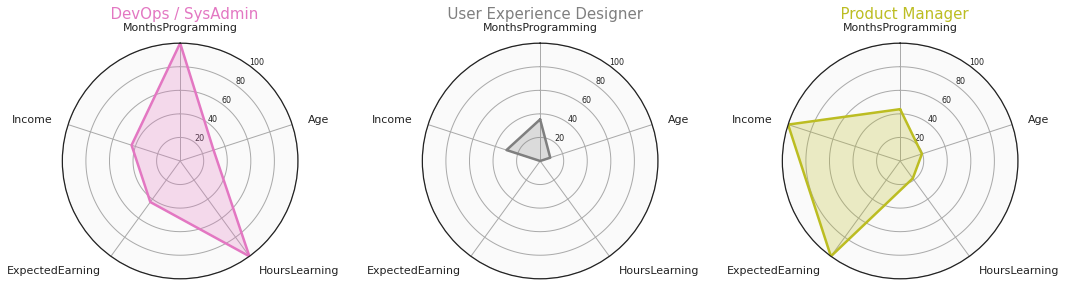

In [66]:
# Helper function to plot each car on the radar chart.
def add_to_radar(Job, color, i):
  values = dft.loc[Job].tolist()
  values += values[:1]
  ax = axes[i]
  ax.plot(angles, values, color=color, linewidth=2.5, label=Job)
  ax.fill(angles, values, color=color, alpha=0.25)

  # Fix axis to go in the right order and start at 12 o'clock.
  ax.set_theta_offset(np.pi / 2)
  ax.set_theta_direction(-1)

  # Draw axis lines for each angle and label.
  ax.set_thetagrids(np.degrees(angles), labels)

  # Go through labels and adjust alignment based on where it is in the circle.
  for label, angle in zip(ax.get_xticklabels(), angles):
    if angle in (0, np.pi):
      label.set_horizontalalignment('center')
    elif 0 < angle < np.pi:
      label.set_horizontalalignment('left')
    else:
      label.set_horizontalalignment('right')

  # Ensure radar goes from 0 to 100.
  ax.set_ylim(0, 100)
  # You can also set gridlines manually like this:
  # ax.set_rgrids([20, 40, 60, 80, 100])

  # Set position of y-labels (0-100) to be in the middle of the first two axes.
  ax.set_rlabel_position(180 / num_vars)

  # Add some custom styling.
  # Change the color of the tick labels.
  ax.tick_params(colors='#222222')
  # Make the y-axis (0-100) labels smaller.
  ax.tick_params(axis='y', labelsize=8)
  # Change the color of the circular gridlines.
  ax.grid(color='#AAAAAA')
  # Change the color of the outermost gridline (the spine).
  ax.spines['polar'].set_color('#222222')
  # Change the background color inside the circle itself.
  ax.set_facecolor('#FAFAFA')
  # Add title.
  ax.set_title(Job, y=1.08, color=color, fontsize=15)

# Add each job to the chart.
jobs = list(data['JobRoleInterest'].unique())[1:]
import matplotlib.colors as mcolors
colors = list(mcolors.TABLEAU_COLORS.values())

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 16), subplot_kw=dict(polar=True))
# adjust space between subplots
fig.tight_layout(pad=6.0)
for i in range(3):
  add_to_radar(jobs[i], colors[i], i)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 16), subplot_kw=dict(polar=True))
# adjust space between subplots
fig.tight_layout(pad=6.0)
for i in range(3, 6):
  add_to_radar(jobs[i], colors[i], i-3)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 16), subplot_kw=dict(polar=True))
# adjust space between subplots
fig.tight_layout(pad=6.0)
for i in range(6, 9):
  add_to_radar(jobs[i], colors[i], i-6)

Mobile developers and User experience designer have the smallest areas, thanks to the lowest months of programming and expected earning for the former, and the lowest hours of learning and expected earning for the latter.



Radar plots are good to show the differences of jobs across several numerical variables. 

## Summary

New coders who are interested in Data scientist/ Data Engineer jobs are slightly different from the rest:
* They have a higher percentage of females
* They spend more hours on learning
* They use online resources such as FCC more
* They do not attend bootcamps much
* They want to work for companies rather than freelance or build their own business
* They have a longer job search horizon
* They have higher degrees such as Masters, PhDs
* They have more student debt
* They have higher income and expected earning
* Fewer are currently working
* Fewer work in tech sector

They also share many common trends:
* Most of them are willing to relocate
* Most of them do not use podcasts or attend in-person events
* They have the same percentage of ethnic minorities.

Front-end developers are the lowest income and expect the lowest next earning. Full stack developers are the oldest, while Mobile developers are the least experienced coders and expect the lowest next earning. User experience designers spend the least number of hours of learning per week and also expect the lowest next earning. 

Product manager have the highest current income and expect the highest next earning. DevOps/ SysAdmin spend the highest number of hours of learning per week and posses the best programming experience. Data scientist/ engineer developers are in the second place in term of current income, expected earning, and learning hours per week.


### Some interesting EDA articles are for this dataset:
* https://www.freecodecamp.org/news/we-asked-15-000-people-who-they-are-and-how-theyre-learning-to-code-4104e29b2781/#.dbl4sh7q8 
* https://davidventuri.github.io/eda-project/ 
